# F20DL Group 17 ML Portfolio

# Imports
Imports needed for our portfolio project. Placed at the top, for ease of keeping track of them.

In [1]:
# installing required libraries for our portfolio

import sys
assert sys.version_info >= (3,5)    # Python >= 3.5 is required

In [2]:
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib

In [3]:
import sklearn
assert sklearn.__version__ >= "0.2"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
# Changing the categorical data to numbers.
from sklearn.preprocessing import OrdinalEncoder


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing

# Logistic regression to the training data
from sklearn.linear_model import LogisticRegression

# Creates the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


In [7]:
from sklearn import feature_selection as fs


In [8]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Week 1
Overview: We shortlisted datasets to work on for the rest of the semester.

## The short-listed tabular datasets were...
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - <font color='#90ee90'> 721 entries and 23 attributes for each entry, a mix of nominal and numerical data. </font>
    - <font color='#90ee90'> There are only 2 attributes with over 50% null values, can be easily cleaned
    and still lots of other attributes </font>
    - <font color='#90ee90'> The dataset is 732Kb, so it does not use a lot of space. </font>
   <br></br>
2. **Netflix Movies and TV Shows** - [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
    - <font color='#90ee90'> Pros:  8807 records with 12 attributes covering all data types (nominal/interval/ratio/ordinal data)</font>
    - <font color='#90ee90'> The dataset is 3.4MB.</font>
    - <font color='#FF7F7F'> 30% of records have null values for a certain attribute - field can be removed or records can be removed (leaving 6000 records) </font>
    <br></br>
3. **Video Game Sales** - [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 16500+ records</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#FF7F7F'>Has a limited number of attributes</font>

## The short-listed computer vision datasets were...

4. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 90000+ high-quality images of over 100 different classes</font>
    - <font color='#90ee90'>The dataset consist of good quality, bad quality, and mixed quality fruit images</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#90ee90'>The dataset has lots of training data which might result in better accuracy</font>
    - <font color='#FF7F7F'>The data might require GPUs for training due to the sheer size of the dataset</font>
    <br></br>
5. **Pokemon Image Dataset** - [Kaggle](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)
    - <font color='#90ee90'>Has images of *all* of the Pokemon from generation 1 to 7</font>
    - <font color='#90ee90'>810 files/images to identify next evolution from the pre-evoled forms of the current Pokemon</font>
    - <font color='#90ee90'>Each Pokemon has two types, primary and secondary. The dataset helps predict the current type of the Pokemon image</font>
    - <font color='#FF7F7F'>Only 3 columns in the dataset, Pokemon, Type1, Type2</font>
    - <font color='#FF7F7F'>Type 2 has 50% null values, meaning half the Pokemons only have type1 which makes the identification pointless</font>
    - <font color='#FF7F7F'>Data is not uniform, the image resolutions are different which can result in conflicts during data analysis</font>


## The datasets we ultimately selected were...
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - For nominal analysis
2. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - For any CNN related tasks.

# Week 2
Overview: We investigated the pokemon data by visualising and summarizing, in order to be aquainted with it.

## 1. We loaded the dataset, described the attributes, and generated summary statistics.

In [9]:
# Loading the CSV onto a data frame
pokemon = pd.read_csv('pokemon_alopez247.csv')
# This displays the top 5 entries, showing its 23 attributes
pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### Attribute Description of the Dataset

This database includes 721 Pokémon records (from first six generations), with 23 attributes.



- **Number**: Unique identifier.
- **Name**: Pokémon name.
- **Type_1**: Primary type.
- **Type_2**: Second type, in case the Pokémon has it.
- **Total**: Sum of base stats (health points, attack, defense, special attack, special defense, and speed).
- **HP**: Base health points.
- **Attack**: Base attack.
- **Defense**: Base defense.
- **Sp_Atk**: Base special attack.
- **Sp_Def**: Base special defense.
- **Speed**: Base speed.
- **Generation**: Generation when the Pokémon was introduced. Ranges from 1 to 6.
- **isLegendary**: Boolean that indicates whether the Pokémon is Legendary or not.
- **Color**: Color of the Pokémon.
- **hasGender**: Boolean that indicates if the Pokémon can be classified as female or male.
- **Pr_male**: If the Pokémon has gender, the probability of being male. The probability of being female is 1 minus this value.
- **EggGroup1**: Egg group of the Pokémon.
- **EggGroup2**: Second egg group of the Pokémon, if it has two.
- **hasMegaEvolution**: If the Pokémon is able to Mega-evolve or not. Boolean value.
- **Height_m**: Pokémon height (m)
- **Weight_kg**: Pokémon weight (kg)
- **Catch_Rate**: Probability of the Pokémon being caught when a Pokéball is thrown at it.
- **Body_Style**: Body style of the Pokémon. E.g., Quadruped.

In [10]:
# Displays the feature name, data type and number of nulls.
# Note: Almost half of "Type_2" attributes are null, because Type 2 is not a required attribute is an optional add-on. 
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [11]:
# Generated summary statistics for the numerical attributes of the dataset
# It is not a complete dataset becuase there are some null values, which is to be dealt with in the next step.
pokemon.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<AxesSubplot:>

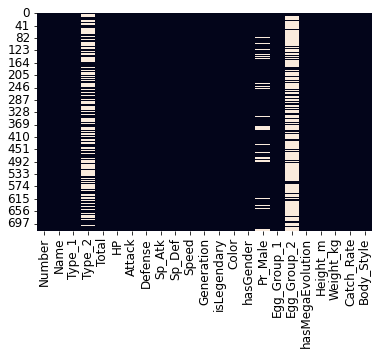

In [12]:
# Indicates where the null values are, within the dataset.
sns.heatmap(pokemon.isnull(), cbar=False)

## 2. Dealt with null values
We replaced the null values with another arbitrary value as they are meaningful.

Attributes will nulls and why they have nulls:

1. *Type_2* has around 50% null values as some Pokemons do not have a second type. Removing all the rows with this as null would reduce our dataset to 50% of the size. Removing this column ends the possibility of identifying and analysising the Pokemon's second type. Replacing this as a string called "None" solves our problem.

2. *Egg_Group_2* has around 75% null value as some Pokemons have only one egg group. Removing all the rows with this as null would reduce our dataset to 25% of the size. Removing this column again ends the possibility of indentifying and analysising the Pokemon's second egg group. Replacing this as a string called "None" solves our problem.

3. *Pr_Male* has around 11% null values, these Pokemons do not have a gender. Removing these rows or columns will cost us the possibility of identifying and predicting the Pokemon's gender. Replacing this with 999 signifies as the Pokemon as genderless.

In [13]:

# Replacing null values of Type_2 to string "None"
pokemon['Type_2'].fillna("None", inplace = True)
# Replacing null values of Egg_Group_2 to string "None"
pokemon['Egg_Group_2'].fillna("None", inplace = True)
# Replacing null values of Pr_Male to 999
pokemon['Pr_Male'].fillna(999, inplace = True)

# Now there are no more null values.
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

## 3. Visualising again, now with a complete dataset
Generated a box plot of the numerical features of our dataset.

<AxesSubplot:>

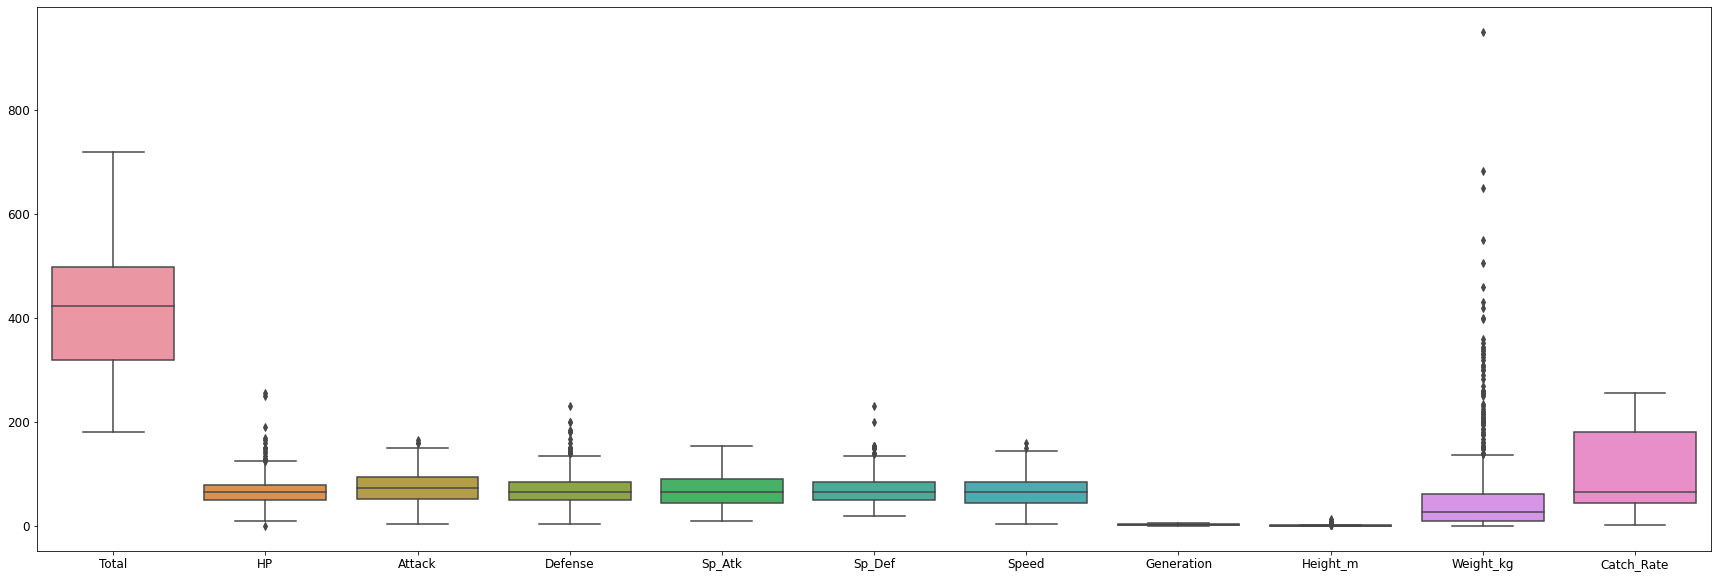

In [14]:
# Generating a box plot to view the numerical data

plt.figure(figsize = (30, 10))
# Taking all numerical data to plot
num_data = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Height_m', 'Weight_kg', 'Catch_Rate']]
# Generating a box plot to visualize the statistical summary 
sns.boxplot(data = num_data)

## 4. Dealing with Categorical Data
We encoded the categorical data.


In [15]:
# Selecting the categorical features of the pokemon dataset
categorical_attributes = ['Type_1', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'Color', 'Body_Style', 'isLegendary', 'hasMegaEvolution', 'hasGender']
print(pokemon[categorical_attributes].head())

  Type_1  Type_2 Egg_Group_1 Egg_Group_2  Color      Body_Style  isLegendary  \
0  Grass  Poison     Monster       Grass  Green       quadruped        False   
1  Grass  Poison     Monster       Grass  Green       quadruped        False   
2  Grass  Poison     Monster       Grass  Green       quadruped        False   
3   Fire    None     Monster      Dragon    Red  bipedal_tailed        False   
4   Fire    None     Monster      Dragon    Red  bipedal_tailed        False   

   hasMegaEvolution  hasGender  
0             False       True  
1             False       True  
2              True       True  
3             False       True  
4             False       True  


In [16]:

enc = OrdinalEncoder()
pokemonCategorical = pokemon[categorical_attributes] = enc.fit_transform(pokemon[categorical_attributes]).astype(int)
print(pokemonCategorical)

[[ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  1  1]
 ...
 [15  4 11 ...  1  1  0]
 [14  8 11 ...  1  0  0]
 [ 6 18 11 ...  1  0  0]]


In [17]:
# Now they are all numerical
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    int32  
 3   Type_2            721 non-null    int32  
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    int32  
 13  Color             721 non-null    int32  
 14  hasGender         721 non-null    int32  
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    int32  
 1

In [18]:
# Now the categorical features are numerically encoded
pokemon[categorical_attributes].head()

,Type_1,Type_2,Egg_Group_1,Egg_Group_2,Color,Body_Style,isLegendary,hasMegaEvolution,hasGender
0,9,14,10,6,3,9,0,0,1
1,9,14,10,6,3,9,0,0,1
2,9,14,10,6,3,9,0,1,1
3,6,12,10,2,7,0,0,0,1
4,6,12,10,2,7,0,0,0,1


## 5. Dropping Unecessary Features
Removed number and name features becuase they will not help in classification.

In [19]:
# Number and name are unnecessary because they will not help us classify the target attributes
pokemon = pokemon.drop(['Number','Name'], axis=1)
pokemon_x = pokemon.drop(['isLegendary'], axis=1)
pokemon_y = pokemon['isLegendary']
pokemon.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,9,14,318,45,49,49,65,65,45,1,...,3,1,0.875,10,6,0,0.71,6.9,45,9
1,9,14,405,60,62,63,80,80,60,1,...,3,1,0.875,10,6,0,0.99,13.0,45,9
2,9,14,525,80,82,83,100,100,80,1,...,3,1,0.875,10,6,1,2.01,100.0,45,9
3,6,12,309,39,52,43,60,50,65,1,...,7,1,0.875,10,2,0,0.61,8.5,45,0
4,6,12,405,58,64,58,80,65,80,1,...,7,1,0.875,10,2,0,1.09,19.0,45,0


## 6. Plotting the Correlation Matrix
We want to see the correlation between each attributes.

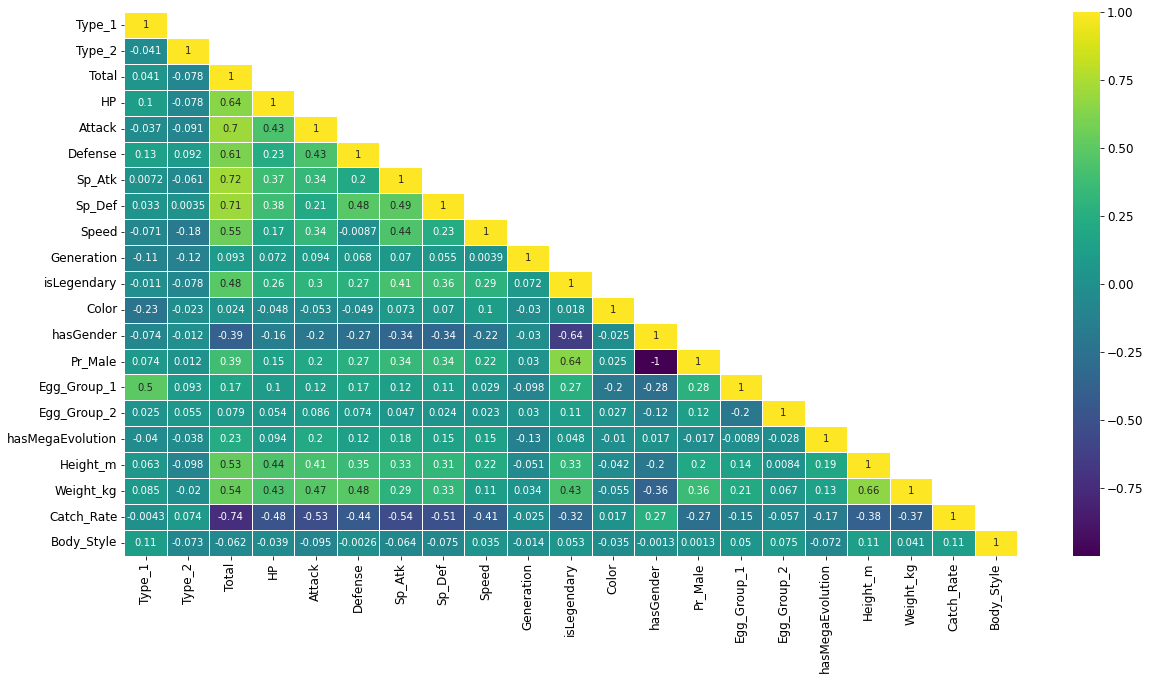

In [20]:
# We want to look at the correlations between each attribute

mask = np.array(pokemon.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
corr_plot = sns.heatmap(pokemon.corr(), mask = mask, annot=True, cmap='viridis', linewidths=.5)

# Week 3:
Overview: Experimented with multiple feature extraction methods and ran a binary classifier on the the resulting datasets.

## 1. Created a binary classification function

In [21]:
# Our binary classification function

def binary_classification(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    ss_train_test = StandardScaler()
    lr = LogisticRegression()
    lr.fit(ss_train_test.fit_transform(X_train), y_train)
    
    # Predicting based off of the test data
    predictions = lr.predict(ss_train_test.fit_transform(X_test))

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    # print('True Positive(TP)  = ', TP)
    # print('False Positive(FP) = ', FP)
    # print('True Negative(TN)  = ', TN)
    # print('False Negative(FN) = ', FN)

    # Accuracy of the classifier
    accuracy =  (TP + TN) / (TP + FP + TN + FN)

    print('Accuracy: {:0.3f}'.format(accuracy))

    return predictions, y_test

In [22]:
#Tried min max scaler instead of standard Scaler :
#Min max scaler got a lower answer, and had more false trues, than the StandardScaler..

## 2. Tried binary classification on original data (without feature extraction)


In [23]:
y_preds, y_true = binary_classification(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'])

Accuracy: 0.986


## 3. Looked at the correlation of each attribute with the target class *isLegendary*
Using Pearson's R

In [24]:
# Computes the standard correlation coefficient (Pearson’s r) with the isLegendary feature

corr_matrix = pokemon.corr()
top_corr = corr_matrix["isLegendary"]
top_corr = abs(top_corr).sort_values(ascending=False).drop('isLegendary')
top_corr

Pr_Male             0.644736
hasGender           0.644714
Total               0.481837
Weight_kg           0.425219
Sp_Atk              0.409739
Sp_Def              0.360215
Height_m            0.326323
Catch_Rate          0.319302
Attack              0.302786
Speed               0.286082
Defense             0.274446
Egg_Group_1         0.271078
HP                  0.258926
Egg_Group_2         0.111683
Type_2              0.078308
Generation          0.071875
Body_Style          0.052852
hasMegaEvolution    0.047955
Color               0.018150
Type_1              0.010503
Name: isLegendary, dtype: float64

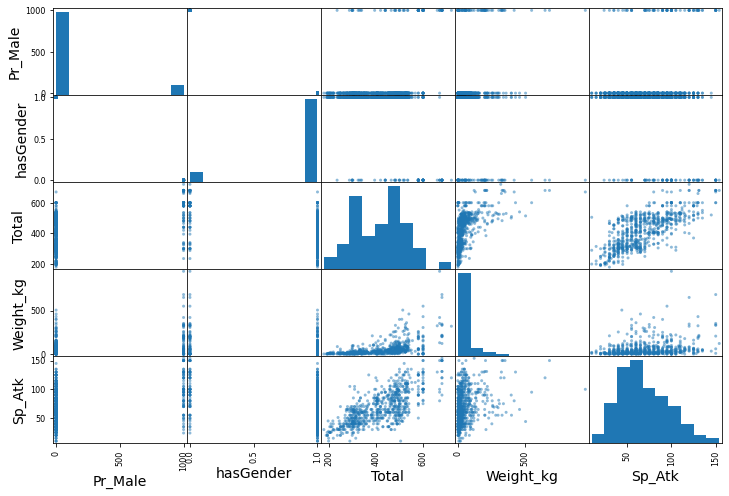

In [25]:
# Visualising the top 5 correlating attributes
attributes = top_corr.index[:5].tolist()
top_5 = scatter_matrix(pokemon[attributes], figsize=(12, 8))

## 4. Created 3 datasets consisting of the top 2, 5, and 10 correlating features respectively 

In [26]:
# Creating datasets using the top 2, 5, and 10 features 
pearsons_r_d1 = pokemon_x[top_corr.index[:2].tolist()]
pearsons_r_d2 = pokemon_x[top_corr.index[:5].tolist()]
pearsons_r_d3 = pokemon_x[top_corr.index[:10].tolist()]

print(pearsons_r_d1.columns.to_list())
print(pearsons_r_d2.columns.to_list())
print(pearsons_r_d3.columns.to_list())

['Pr_Male', 'hasGender']
['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk']
['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk', 'Sp_Def', 'Height_m', 'Catch_Rate', 'Attack', 'Speed']


We also ran the classifier on dataset containing the top 1, 2, 3, …, 20 correlating attributes based on Pearson’s R. Using this we wanted to find out what the optimal number of attributes to use is, for higher accuracy.

In [27]:
# Checking to when the accuracy plateaus to know what the optimal number of features are.
for x in range(1,21):
    print("Using the top " + str(x) + " features: ")
    binary_classification(pokemon_x[top_corr.index[:x].tolist()],pokemon_y)

Using the top 1 features: 
Accuracy: 0.935
Using the top 2 features: 
Accuracy: 0.935
Using the top 3 features: 
Accuracy: 0.986
Using the top 4 features: 
Accuracy: 0.986
Using the top 5 features: 
Accuracy: 0.977
Using the top 6 features: 
Accuracy: 0.982
Using the top 7 features: 
Accuracy: 0.977
Using the top 8 features: 
Accuracy: 0.986
Using the top 9 features: 
Accuracy: 0.986
Using the top 10 features: 
Accuracy: 0.986
Using the top 11 features: 
Accuracy: 0.986
Using the top 12 features: 
Accuracy: 0.986
Using the top 13 features: 
Accuracy: 0.986
Using the top 14 features: 
Accuracy: 0.986
Using the top 15 features: 
Accuracy: 0.986
Using the top 16 features: 
Accuracy: 0.986
Using the top 17 features: 
Accuracy: 0.986
Using the top 18 features: 
Accuracy: 0.986
Using the top 19 features: 
Accuracy: 0.986
Using the top 20 features: 
Accuracy: 0.986


## 4. Tried an alternative feature extraction method: Embedded Methods
Using this method, we extracted 3 attributes. Running the classifier on this obtained an accuracy of 0.986

In [28]:
X_train_embedded, X_test_embedded, y_train_embedded, y_test_embedded = train_test_split(pokemon_x, pokemon_y, test_size=0.3, random_state=10)

In [29]:
# train model using lasso
lasso = linear_model.Lasso()
lasso.fit(X_train_embedded, y_train_embedded)

# perform feature selection
pokemon_embedded_methods = [feature for feature, weight in zip(pokemon_x.columns.values, lasso.coef_) if weight != 0]
print("Features that have been selected are: ",pokemon_embedded_methods)
em_prediction, em_y_test = binary_classification(pokemon[pokemon_embedded_methods], pokemon_y)

Features that have been selected are:  ['Total', 'Pr_Male', 'Weight_kg']
Accuracy: 0.986


## 5. Tried an alternative feature extraction method: Mutual Information
Ran a decision tree classifier on a dataset containing the top 5 features and achieved an accuracy of 0.988. 

In [30]:
# preparing data for mutual information

Data = preprocessing.MinMaxScaler().fit_transform(pokemon_x)
target = preprocessing.LabelEncoder().fit_transform(pokemon_y)

In [31]:
# The code below returns the indices of the 5 features that have the highest mutual information value
num_features = 5
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = pokemon.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Total', 'Weight_kg', 'Pr_Male', 'hasGender', 'Color'],
      dtype=object)

In [32]:
# Gives the scores of the values we got before
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.20009413, 0.18030913, 0.17298285, 0.12483667, 0.12438711])

In [33]:
# Function to plot a graph to plot the feature selection and show correspondance to different feature selection methods

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances for legendary')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

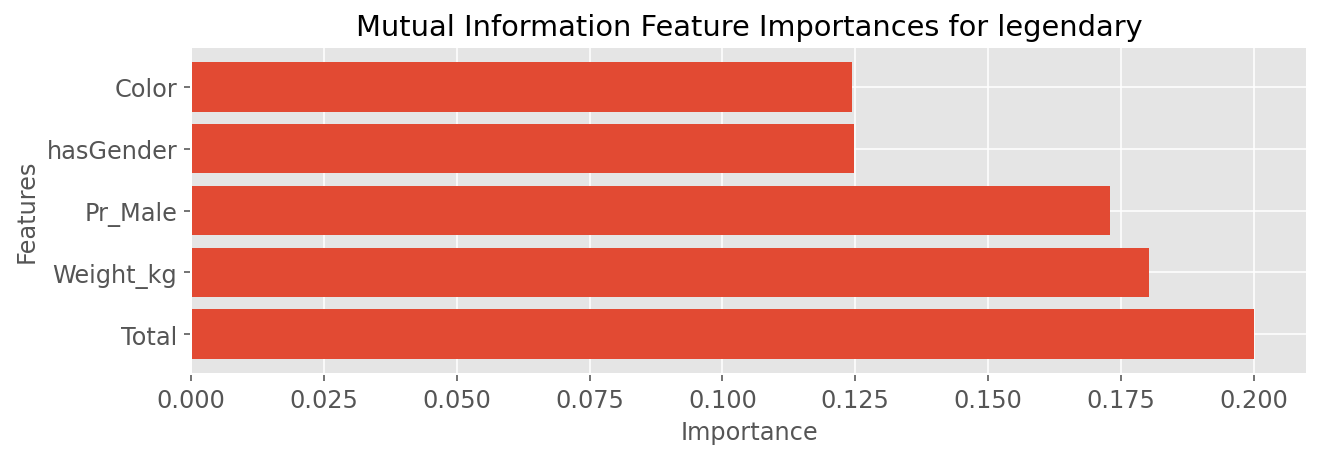

In [34]:
plt.figure(figsize = (10, 3))
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

In [35]:
# A method used during validation where we use stratified 5-fold cross-validation with 3 repetitions and set the random state to 999
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
# Specifies scoring metric
scoring_metric = 'accuracy'

In [36]:
# Uses the decision tree classifier with default values.
clf = DecisionTreeClassifier(random_state=999)

In [37]:
# Evaluate the performance of these 5 features for mutual Information
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.988

## 6. Tried an alternative feature extraction method: Chi Squared
Ran binary classification on the dataset containing the top 2, 5, and 10 correlating attributes based on Chi and obtained accuracies of 0.968, 0.982, and 0.982 respectively

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for x in [2, 5, 10]:
    X_chi = SelectKBest(chi2, k = x)
    X_kbest = X_chi.fit_transform(pokemon_x, pokemon_y)
    mask = X_chi.get_support()
    new_features = pokemon_x.columns[mask]
    print('Original number of features:', pokemon_x.shape)
    print('Reduced number of features:', X_kbest.shape)
    print('Features reduced to:', new_features.str.cat(sep=", "))
    chi_prediciton, chi_y_test = binary_classification(X_kbest, pokemon_y)
    print("------------")

Original number of features: (721, 20)
Reduced number of features: (721, 2)
Features reduced to: Pr_Male, Weight_kg
Accuracy: 0.968
------------
Original number of features: (721, 20)
Reduced number of features: (721, 5)
Features reduced to: Total, Sp_Atk, Pr_Male, Weight_kg, Catch_Rate
Accuracy: 0.982
------------
Original number of features: (721, 20)
Reduced number of features: (721, 10)
Features reduced to: Total, HP, Attack, Defense, Sp_Atk, Sp_Def, Speed, Pr_Male, Weight_kg, Catch_Rate
Accuracy: 0.982
------------


# Week 4 
Ran classifiers on the dataset and recorded the common performance metrics

## 1. Plotting the ROC curve 
For the logistic regression and decision tree classifiers.

In [39]:
X = pokemon.drop(['isLegendary'], axis=1)
y = pokemon['isLegendary']

# Split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# Creating objects for classifier and training the classifier with the train split of the dataset
clf_tree = DecisionTreeClassifier()
# Setting max iteration super high to fix converging too fast
clf_reg = LogisticRegression(max_iter=1200000)

clf_tree.fit(X_train, y_train)
clf_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

In [40]:
# Using the models on test dataset
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [41]:
# Creating False and True Positive Rates
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [42]:
# Printing Scores
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.9173857868020305
roc_auc_score for Logistic Regression:  0.9883248730964467


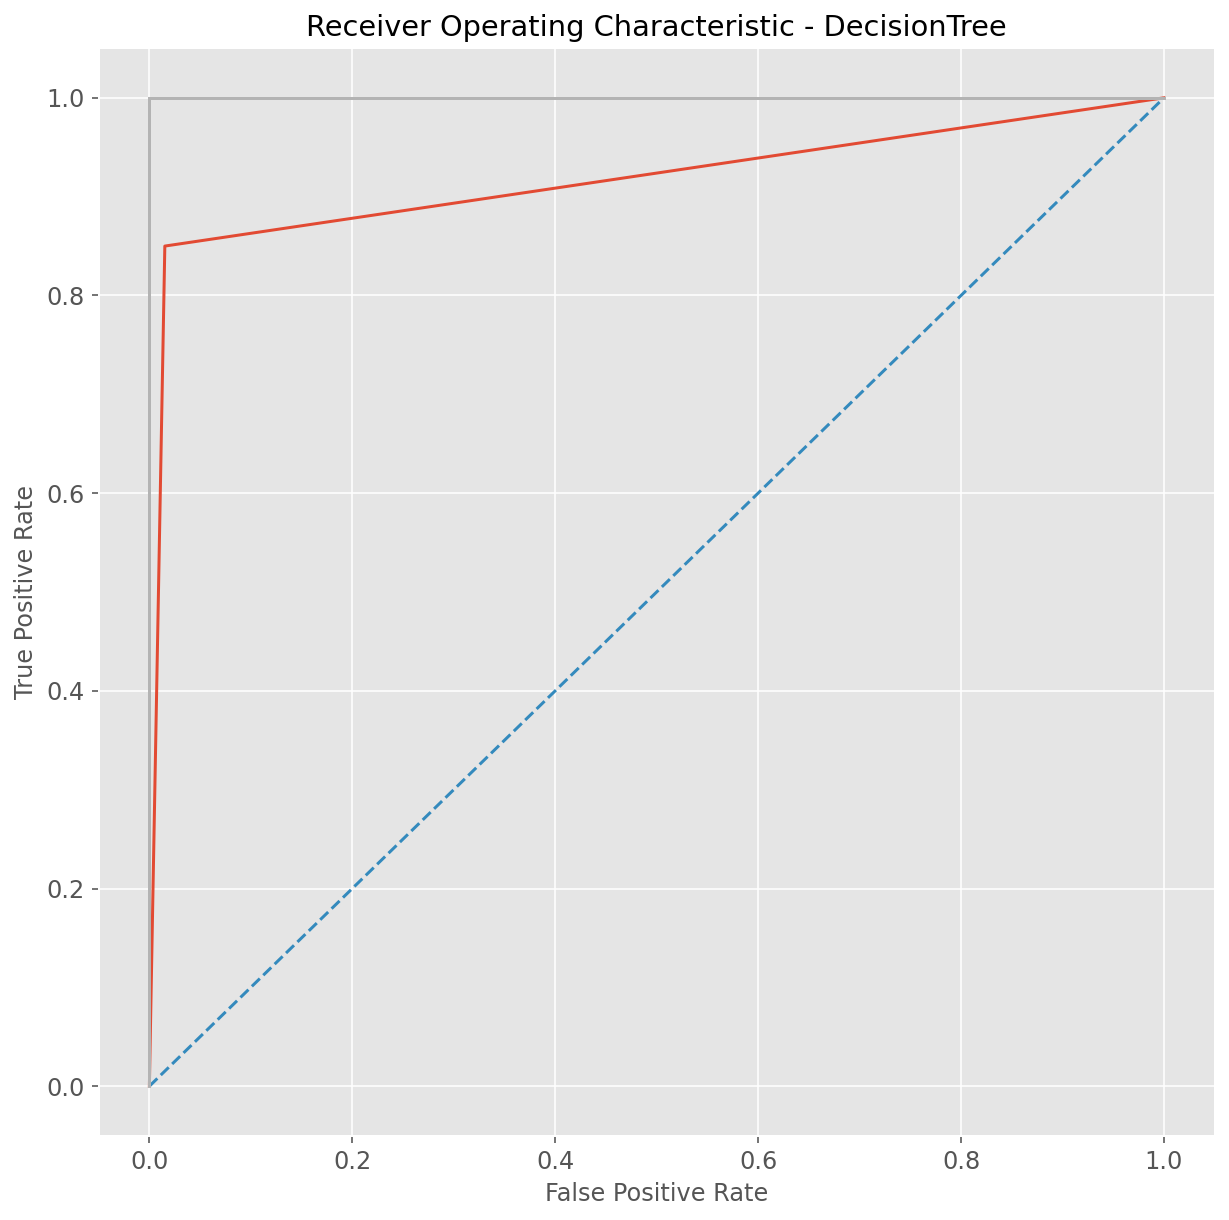

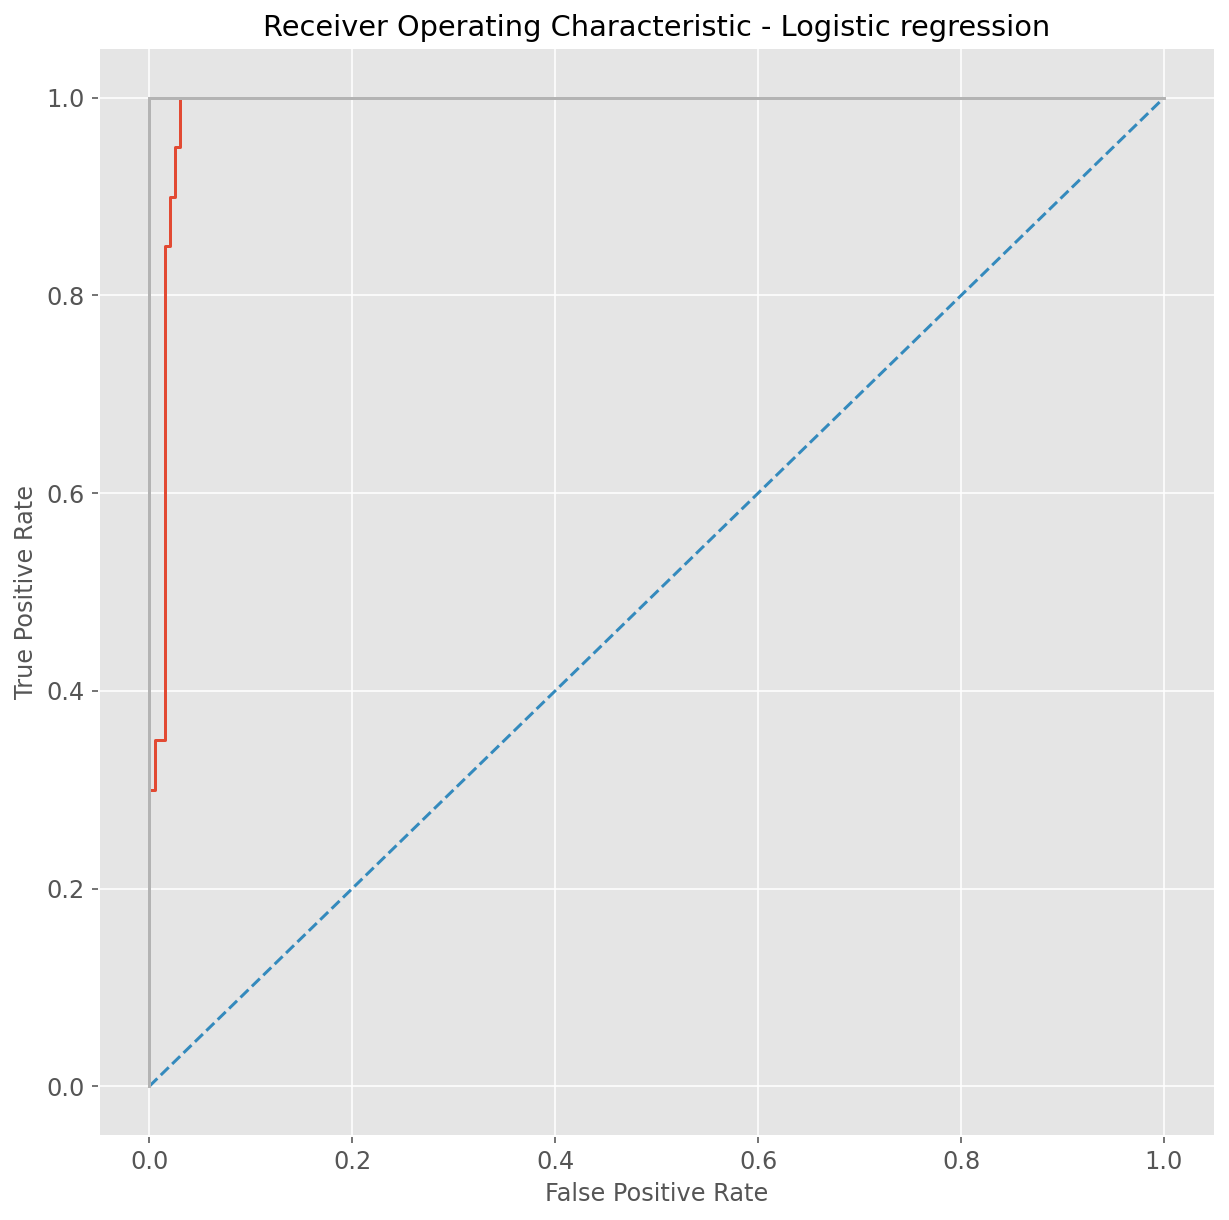

In [43]:
# Ploting ROC Curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
# creating the confusion matrix
predictions, y_test = binary_classification(pokemon_x,pokemon_y)
confusion = confusion_matrix(y_test, predictions)
print(confusion)

Accuracy: 0.986
[[202   3]
 [  0  12]]


In [45]:
def plot_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted isLengendary')
    ax.set_ylabel('Actual Legendary Category ');

    # ticket labels - list must be in numerical order
    ax.xaxis.set_ticklabels(['Legendary','Not Legendary'])
    ax.yaxis.set_ticklabels(['Legendary','Not Legendary'])

    # display the visualization of the Confusion Matrix.
    plt.show()

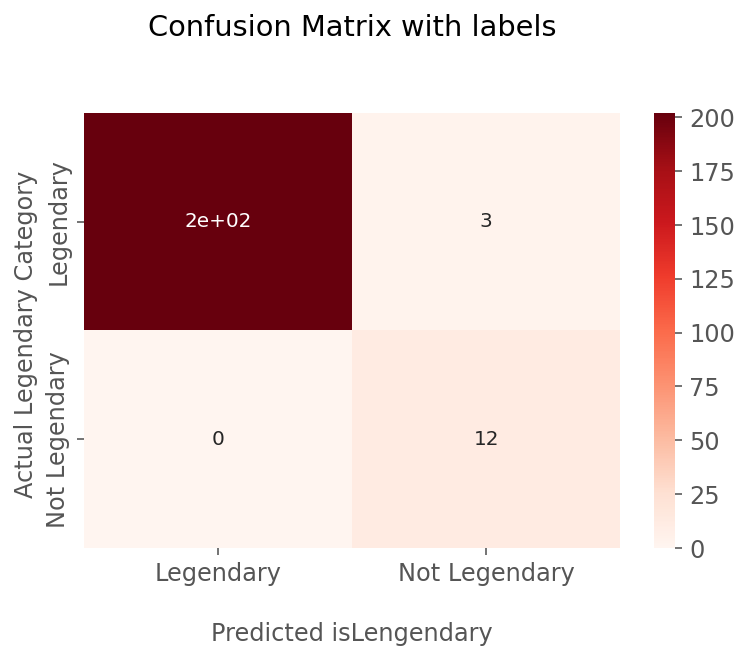

In [46]:
plot_matrix(confusion)

## 2. Plotted the ROC curve for multiclass data 

c:\Users\alora\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\alora\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


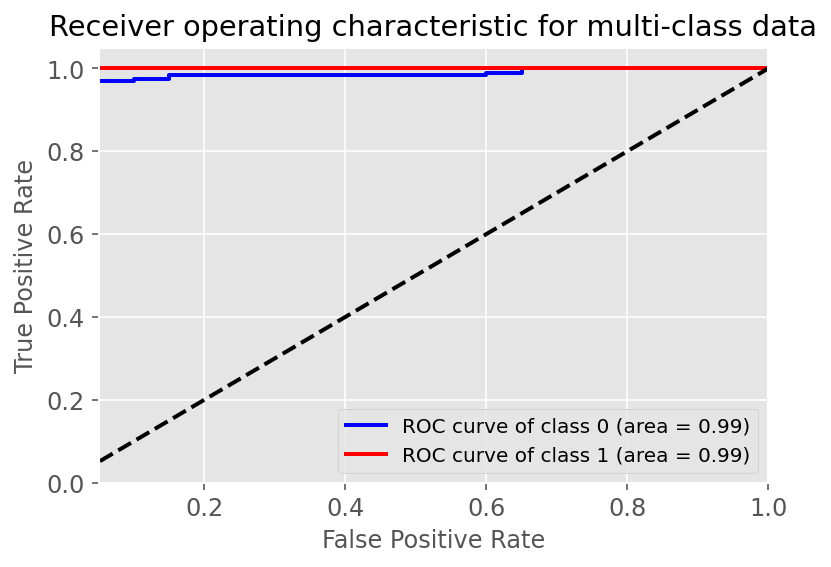

In [47]:
# importing the classifiers
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import svm
from itertools import cycle

# separating the target attributes and the rest of the data
X = pokemon.drop(['isLegendary'], axis=1)
y = pokemon['isLegendary']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# # splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes-1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
...
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## 3. Recorded the major performance metrics
And analysed them

In [48]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def evalMetrics(y_test,predictions,name):
    #importing accuracy_score, precision_score, recall_score, f1_score
    print(name)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predictions, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predictions, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predictions, average='weighted')))

In [49]:
y_preds, y_true = binary_classification(pearsons_r_d2, pokemon_y)
evalMetrics(y_preds, y_true, "Pearsons R: ")
print('\nClassification Report\n')
print(classification_report(y_preds, y_true, target_names=['is Legendary','not Legendary']))

Accuracy: 0.977
Pearsons R: 
Accuracy: 0.98
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98

Classification Report

               precision    recall  f1-score   support

 is Legendary       0.99      0.99      0.99       204
not Legendary       0.83      0.77      0.80        13

     accuracy                           0.98       217
    macro avg       0.91      0.88      0.89       217
 weighted avg       0.98      0.98      0.98       217



### Record Of Major Metrics

- ROC: In the ROC graph 1.0 represents perfect classifier and the further we are from the random classifier the better our results are. Over here we can see that the ROC curve of class 1 which is "True" has the higher accuracy. The AUC for decisionTree is 94% while logistic Regression is 98%
- Accuracy: Our total accuracy is 98%, calculated by (all correct / all)
- Precision: Our precision for weighted is 98% but out precision for macro is 91% which is significantly lower than weighted, calculated by (true positives / predicted positives)
- Recal: Our recal for weighted is 98% but our macro is only 88% which is significantly lower than weighted, calculated by (true positives / all actual positives)
- F1 Score: F1 score of weighted was 98% but for macro it was only 89% becasue of the pression and recal being low for macro

- F1 score is reliable as a metric for our dataset while accuracy is not.

# Week 5
Overview: Ran several variations of Bayes Nets classifier and recorded major metrics for each

- Accuracy
- TP, FP, TN, FN
- Sensitivity
- Specificity
- Precision
- Recall
- AUC

In [50]:
# helper function:
def calculate_metrics(matrix,y_test,predicted,msg):
    # Using the method evalMetric function defined in Week 3 to calculate accuracy, precision, recall, and f-1
    
    evalMetrics(y_test, predicted, msg)
    
    # Print the TP, TN, FP, FN
    TP = matrix[0,0]
    FN = matrix[0,1]
    FP = matrix[1,0]
    TN = matrix[1,1]

    print("TP: " + str(TP))
    print("FN: " + str(FN))
    print("FP: " + str(FP))
    print("TN: " + str(TN))

    # Calculating the specificity = TN/(TN+TP)
    specificity = TN/(TN+TP)
    print("Specificity: " + str(specificity))

    # Calculating the sensitivity = TP/(TP+FN)
    sensitivity = TP/(TP+FN)
    print("Sensitivity: " + str(sensitivity))

    # calculating the AUC
    fpr, tpr, threshold = roc_curve(y_test, predicted)
    mul_auc = auc(fpr, tpr)
    print("The AUC is: " + str(mul_auc))

In [51]:
#Splitting up the data, it will be used for all of the Naive Bayes:
X_train, X_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size=0.33, shuffle=True)

## 1. Using Multinomial Naive Bayes

Anoter example of the Naives Bayes Classifier. The data is assumed to be generated from a simple multinomial distribution. This predicts the probablity of observing counts.

In [52]:
# to convert the content of each string into a vector of numbers
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
multinomial_predicted = model.predict(X_test)

multinomial_accuracy = accuracy_score(y_test, multinomial_predicted)
print("Accuracy after using Multinomial Naive Bayes", round(multinomial_accuracy * 100, 2), "%")

Accuracy after using Multinomial Naive Bayes 92.44 %


### Plotting the Confusion Matrix

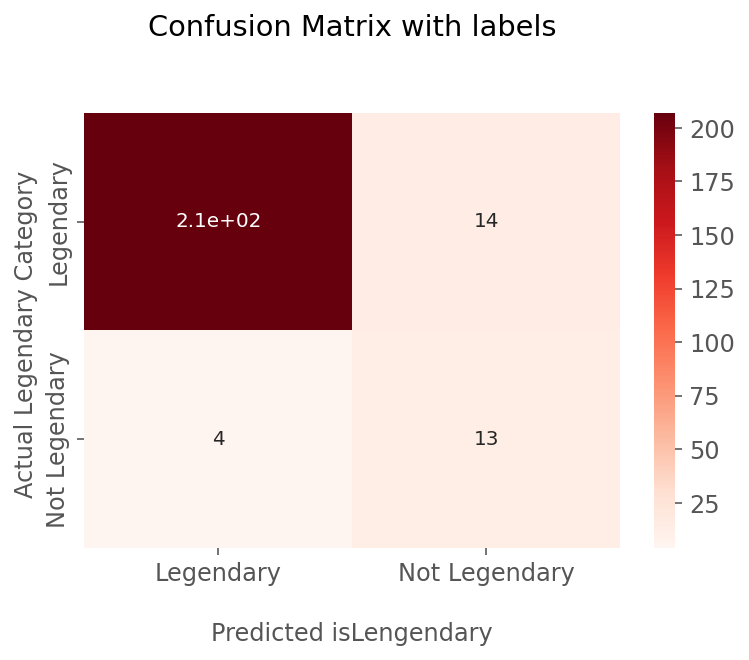

In [53]:
# Plotting the confusion matrix
multinomial_matrix = confusion_matrix(y_test, multinomial_predicted)
plot_matrix(multinomial_matrix)

### Calculating the Metrics

In [54]:
calculate_metrics(multinomial_matrix,y_test,multinomial_predicted,"Multinomial Naive Bayes Performance Metrics: ")

Multinomial Naive Bayes Performance Metrics: 
Accuracy: 0.92
Weighted Precision: 0.95
Weighted Recall: 0.92
Weighted F1-score: 0.93
TP: 207
FN: 14
FP: 4
TN: 13
Specificity: 0.05909090909090909
Sensitivity: 0.9366515837104072
The AUC is: 0.8506787330316742


## 2. Using Gaussian Naive Bayes

In [55]:
# Training the model on the training data:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()
g_model.fit(X_train,y_train)
g_predicted = g_model.predict(X_test)

In [56]:
#Getting accuracy:
g_accuracy = g_model.score(X_test,y_test)
print("Accuracy of Gaussian Naive Bayes", g_accuracy)

Accuracy of Gaussian Naive Bayes 0.9873949579831933


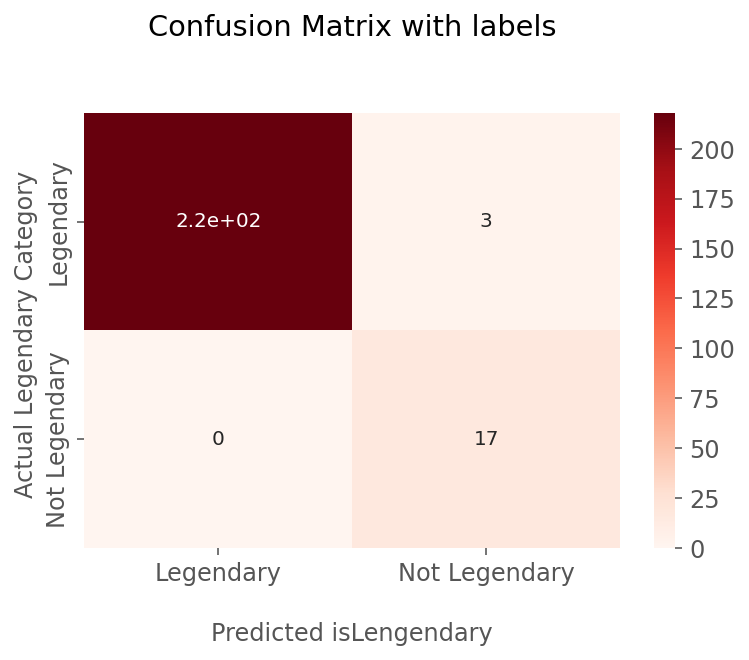

In [57]:
g_matrix = confusion_matrix(y_test, g_predicted)
plot_matrix(g_matrix)

In [58]:
calculate_metrics(g_matrix,y_test,g_predicted,"Gaussian Naive Bayes Performance Metrics: ")

Gaussian Naive Bayes Performance Metrics: 
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 218
FN: 3
FP: 0
TN: 17
Specificity: 0.07234042553191489
Sensitivity: 0.9864253393665159
The AUC is: 0.9932126696832579


## 3. Using Complement Naive Bayes

A variant of the Naive Bayes classifier.
This variant works better with imbalanced datasets, which the Pokemon dataset is since there are more non legendary pokemon than legendary pokemon.
Compared to normal Naive Bayes, it calculates the likelihood that the selected feature occurs in other classes annd picks the lowest probability. 


In [59]:
# Import required modules
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import ComplementNB

# Creating and training the Complement Naive Bayes Classifier
classifier = ComplementNB()
classifier.fit(X_train, y_train)
  
# Evaluating the classifier
c_prediction = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

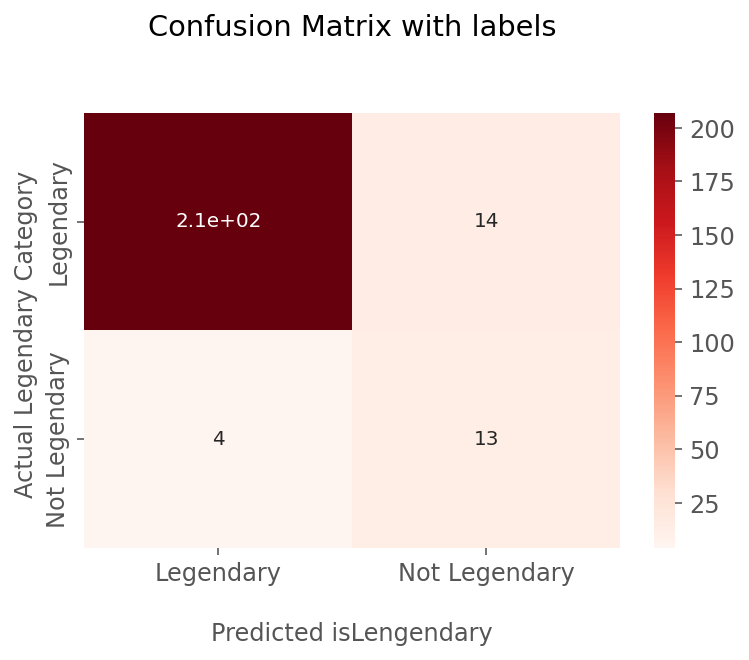

In [60]:
##Plotting the confusion matrix
matrixC = confusion_matrix(y_test, c_prediction)
plot_matrix(matrixC)

In [61]:
calculate_metrics(matrixC,y_test,c_prediction,"Complement Naive Bayes Performance Metrics: ")

Complement Naive Bayes Performance Metrics: 
Accuracy: 0.92
Weighted Precision: 0.95
Weighted Recall: 0.92
Weighted F1-score: 0.93
TP: 207
FN: 14
FP: 4
TN: 13
Specificity: 0.05909090909090909
Sensitivity: 0.9366515837104072
The AUC is: 0.8506787330316742


## 4. Using Bernoulli Naive Bayes

A variant of the Naive Bayes classifier.
The data is assumed to be binary, otherwise the data is binarized.
The target class must be binary, which it is, so this classifier is applicable.


In [62]:
# importing required packages
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

### Running the Bernoulli Naive Bayes Classifier
Note: The optimal parameter for the BernoulliNaive Bayes classifier was found to be 1.1, so that was the final chosen value of the parameter.

In [63]:
# Running the classifier
# Looping for different values of binarize to find the optimal value

binarizeThreshold = 0
while(binarizeThreshold <= 1):
    BernNB = BernoulliNB(binarize = binarizeThreshold)
    binarizeThreshold = round(binarizeThreshold + 0.1, 1)
    BernNB.fit(X_train, y_train)
    y_expect = y_test
    y_pred = BernNB.predict(X_test)
    print("Threshold for binarizing: " + str(binarizeThreshold) + ", accuracy: " + str(accuracy_score(y_expect,y_pred)))


Threshold for binarizing: 0.1, accuracy: 0.9285714285714286
Threshold for binarizing: 0.2, accuracy: 0.9285714285714286
Threshold for binarizing: 0.3, accuracy: 0.9327731092436975
Threshold for binarizing: 0.4, accuracy: 0.9327731092436975
Threshold for binarizing: 0.5, accuracy: 0.9327731092436975
Threshold for binarizing: 0.6, accuracy: 0.9243697478991597
Threshold for binarizing: 0.7, accuracy: 0.9243697478991597
Threshold for binarizing: 0.8, accuracy: 0.9285714285714286
Threshold for binarizing: 0.9, accuracy: 0.9411764705882353
Threshold for binarizing: 1.0, accuracy: 0.9243697478991597
Threshold for binarizing: 1.1, accuracy: 0.9369747899159664


### Performance Evaluation of the Bernoulli Naive Bayes Classifier
Computed the performance of the algorithm using the common performance metrics, which listed below the Week 5 section header.

#### Plotting the confusion matrix of the classifier

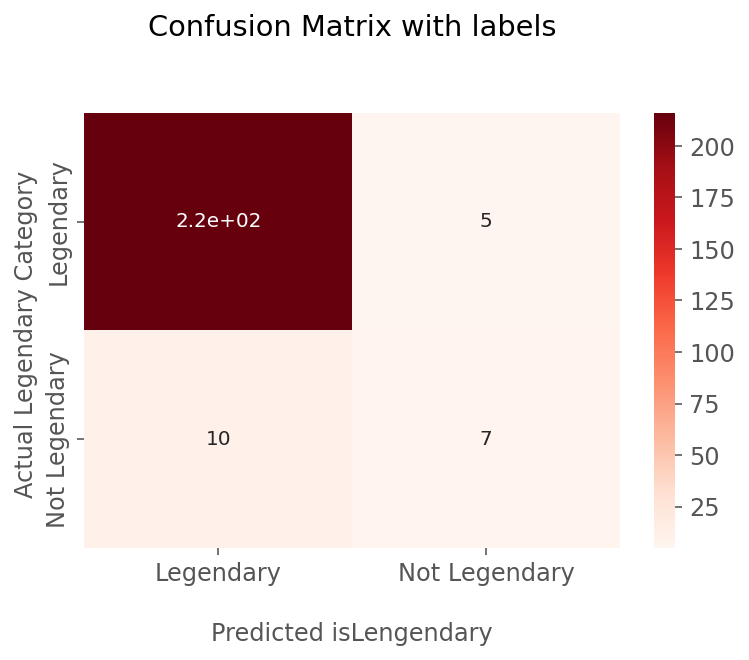

In [64]:
# Plotting the confusion matrix
Bern_matrix = confusion_matrix(y_expect, y_pred)
plot_matrix(Bern_matrix)

#### Calculating the major metrics

In [65]:
calculate_metrics(Bern_matrix,y_expect,y_pred,"Bernoulli Naive Bayes Performance Metrics: ")

Bernoulli Naive Bayes Performance Metrics: 
Accuracy: 0.94
Weighted Precision: 0.93
Weighted Recall: 0.94
Weighted F1-score: 0.93
TP: 216
FN: 5
FP: 10
TN: 7
Specificity: 0.03139013452914798
Sensitivity: 0.9773755656108597
The AUC is: 0.6945701357466062


## 5. Using Categorical Naive Bayes

In [66]:
print(pokemonCategorical)
from sklearn.naive_bayes import CategoricalNB


# Separating the features from the target class
XCat = pokemon[categorical_attributes].drop('isLegendary', axis=1) 
yCat = pokemon['isLegendary']
print(XCat.head())


[[ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  1  1]
 ...
 [15  4 11 ...  1  1  0]
 [14  8 11 ...  1  0  0]
 [ 6 18 11 ...  1  0  0]]
   Type_1  Type_2  Egg_Group_1  Egg_Group_2  Color  Body_Style  \
0       9      14           10            6      3           9   
1       9      14           10            6      3           9   
2       9      14           10            6      3           9   
3       6      12           10            2      7           0   
4       6      12           10            2      7           0   

   hasMegaEvolution  hasGender  
0                 0          1  
1                 0          1  
2                 1          1  
3                 0          1  
4                 0          1  


In [67]:

from sklearn.model_selection import train_test_split

X_trainCat, X_testCat, y_trainCat, y_testCat = train_test_split(XCat, yCat, test_size = 0.5, stratify=yCat)
#clf = CategoricalNB(min_categories=int(min_categories=pokemon['isLegendary'].nunique()))
clf = CategoricalNB()
clf.fit(X_trainCat, y_trainCat)
# X_testCat
# X_test2 = X_test2[1:,1:]
y_predCat = clf.predict(X_testCat)
#print(np.array(y_test2).reshape(-1, 1))
#accuracy = clf.score(np.array(y_testCat).reshape(1, -1), y_predCat)
#accuracy = clf.score(y_testCat, y_predCat)
accuracy_score(y_testCat, y_predCat)

#print("Accuracy after using Multinomial Naive Bayes", round(accuracy * 100, 2), "%")

0.9695290858725761

In [68]:
cat_matrix = confusion_matrix(y_testCat, y_predCat)
calculate_metrics(cat_matrix, y_testCat, y_predCat, "Categorical Naive Bayes:")

Categorical Naive Bayes:
Accuracy: 0.97
Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1-score: 0.97
TP: 330
FN: 8
FP: 3
TN: 20
Specificity: 0.05714285714285714
Sensitivity: 0.9763313609467456
The AUC is: 0.9229482891690249


## 6. Using Complex Bayes Nets

## 7. Conclusions: Comparison of the methods 

# Week 6

### Gaussian Mixture Models

# Week 7

## 1. Running KMeans Clustering on our Pokemon dataset

### helper function to print out the figure.

In [69]:
def plt_fig_n(x_label,y_lable,y_label_msg):  
    # Generate the elbow plot
    fig = plt.subplots(figsize = (10,5))
    plt.plot(x_label, y_lable, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel(y_label_msg)
    plt.grid(True)
    plt.show()

### Standardizing the data

In [70]:
# Standardising the data, so that features contribute equal weight
# Question: Should the target class be dropped?
scaler = StandardScaler()

# Version 1: Target class dropped 
scaler.fit(pokemon.drop(['isLegendary'], axis=1))
scaled_pokemon_data_without_target = scaler.transform(pokemon.drop(['isLegendary'], axis=1))
# print(scaled_pokemon_data_without_target)

# Version 2: Target class preserved
scaler.fit(pokemon)
scaled_pokemon_data_with_target = scaler.transform(pokemon)
# print(scaled_pokemon_data_with_target)

### Running the KMeans on the dataset

Here we are fitting the pokemon data (including the target class isLegendary) to the KMeans algorithm. 

In [71]:
from sklearn.cluster import KMeans
# applying the Kmeans algorithm
kmeans = KMeans(n_clusters=3)
# Running on the data with the target class.
kmeans.fit(scaled_pokemon_data_with_target)

KMeans(n_clusters=3)

Below are the clusters each of the 721 pokemon records has been assigned to.

In [72]:
# Attaching the cluster labels to the pokemon dataset
#kmeans.labels_

### To be able to plot the data into a 2 dimensional space, we must reduce the number of features into 2.
This is done here using Principle Component Analysis

In [73]:
# applying PCA
from sklearn.decomposition import PCA
# reducing it into 2 components.
pca = PCA(n_components=2)
# fitting the scaled data into PCA algorithm
pca.fit(scaled_pokemon_data_with_target)
pokemon_pca = pca.transform(scaled_pokemon_data_with_target)

#### Dimensions have reduced from 22 to 2

In [74]:
print(scaled_pokemon_data_with_target.shape)
print(pokemon_pca.shape)

(721, 21)
(721, 2)


#### Visualising the PCA features

After plotting the data, it seems that there are 5 clusters. They are not of spherical shape, so clustering does not seem like a meaningful algorithm for this data.


[]

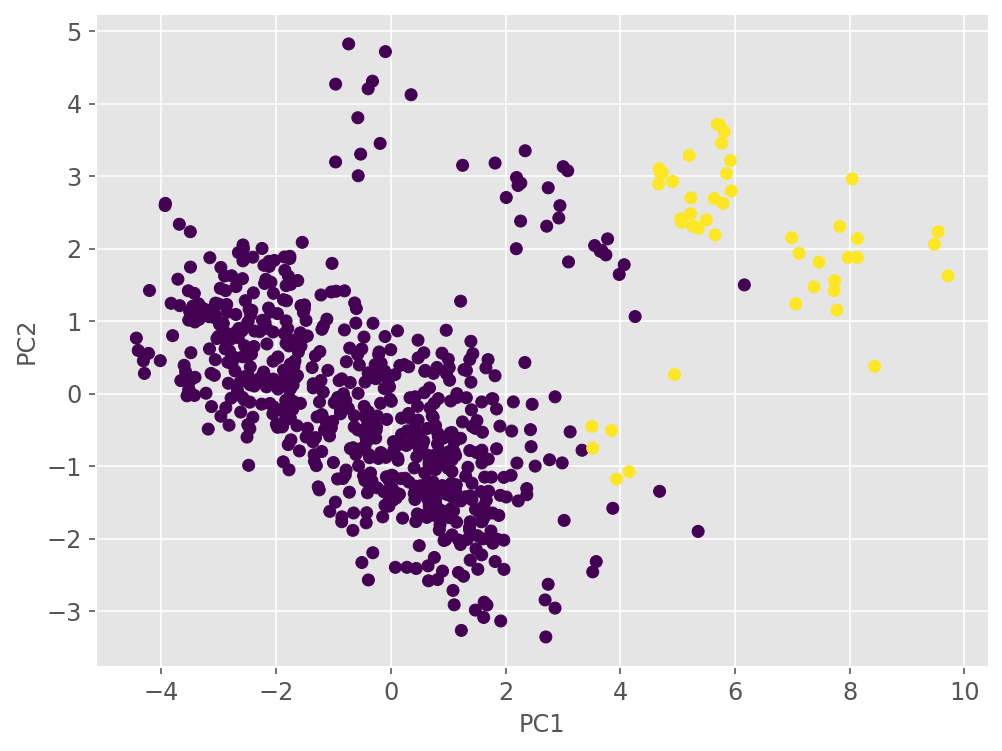

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=pokemon['isLegendary'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot()

### Visualising the results from KMeans Clustering

Each color represents the cluster the pokemon has been assigned to.

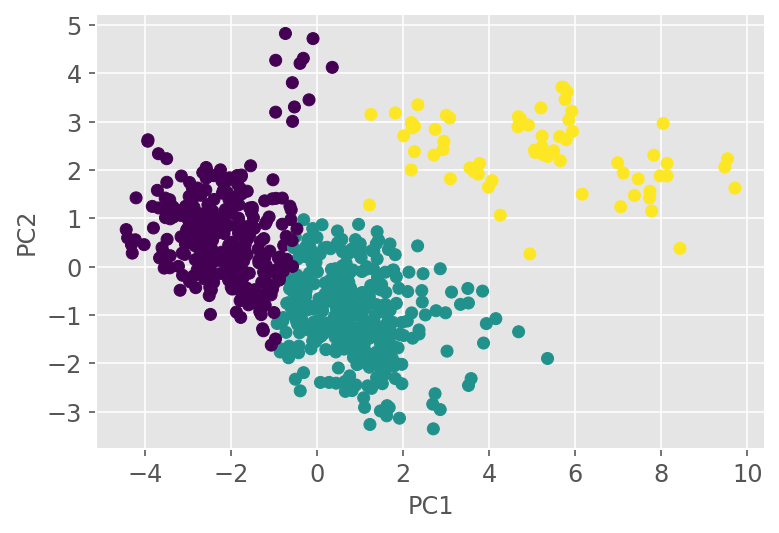

In [76]:
# Visualising the results
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 2. K-means Clustering

Using pearsons r to get the top two correlating features and plotting them for clustering.

In [77]:
print(pearsons_r_d1.shape)

(721, 2)


### Evaluating the clusters

## Expectation Maximization Clustering

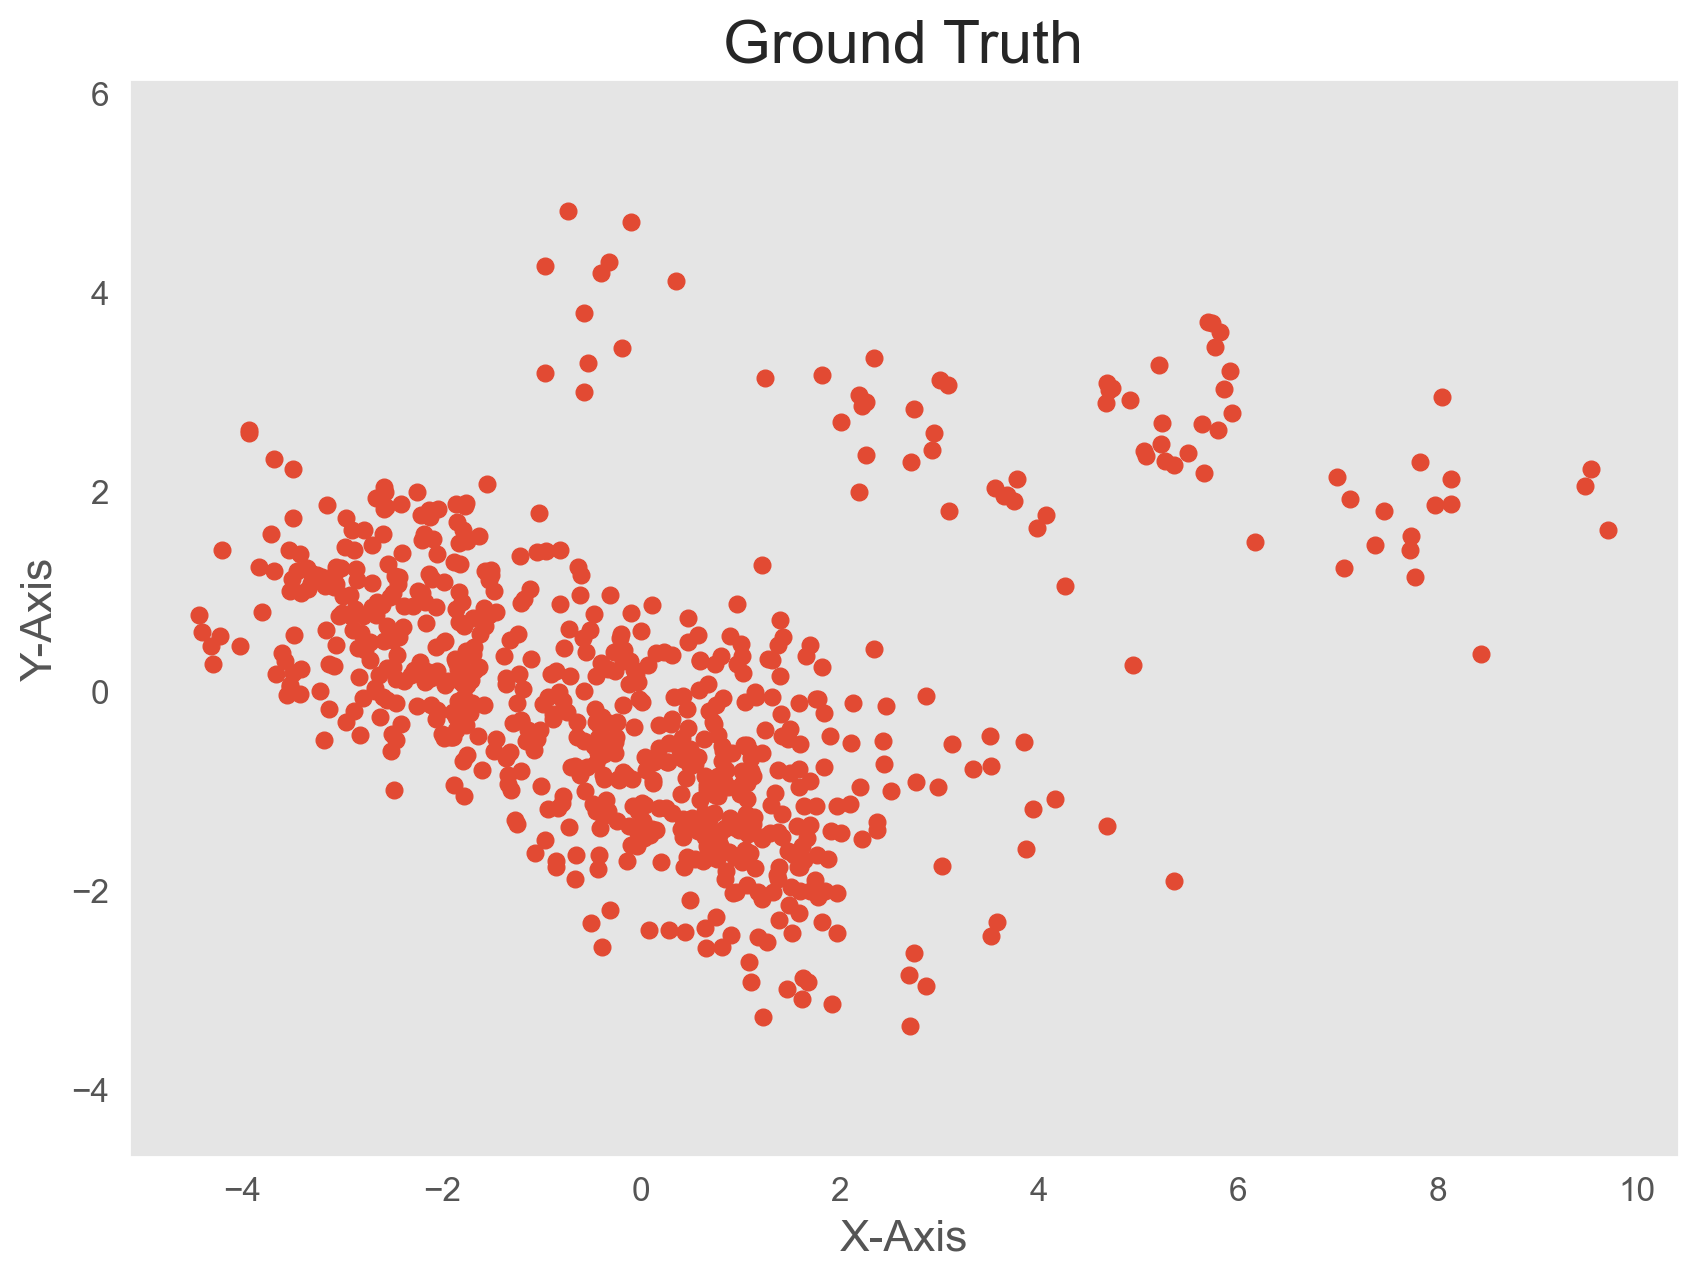

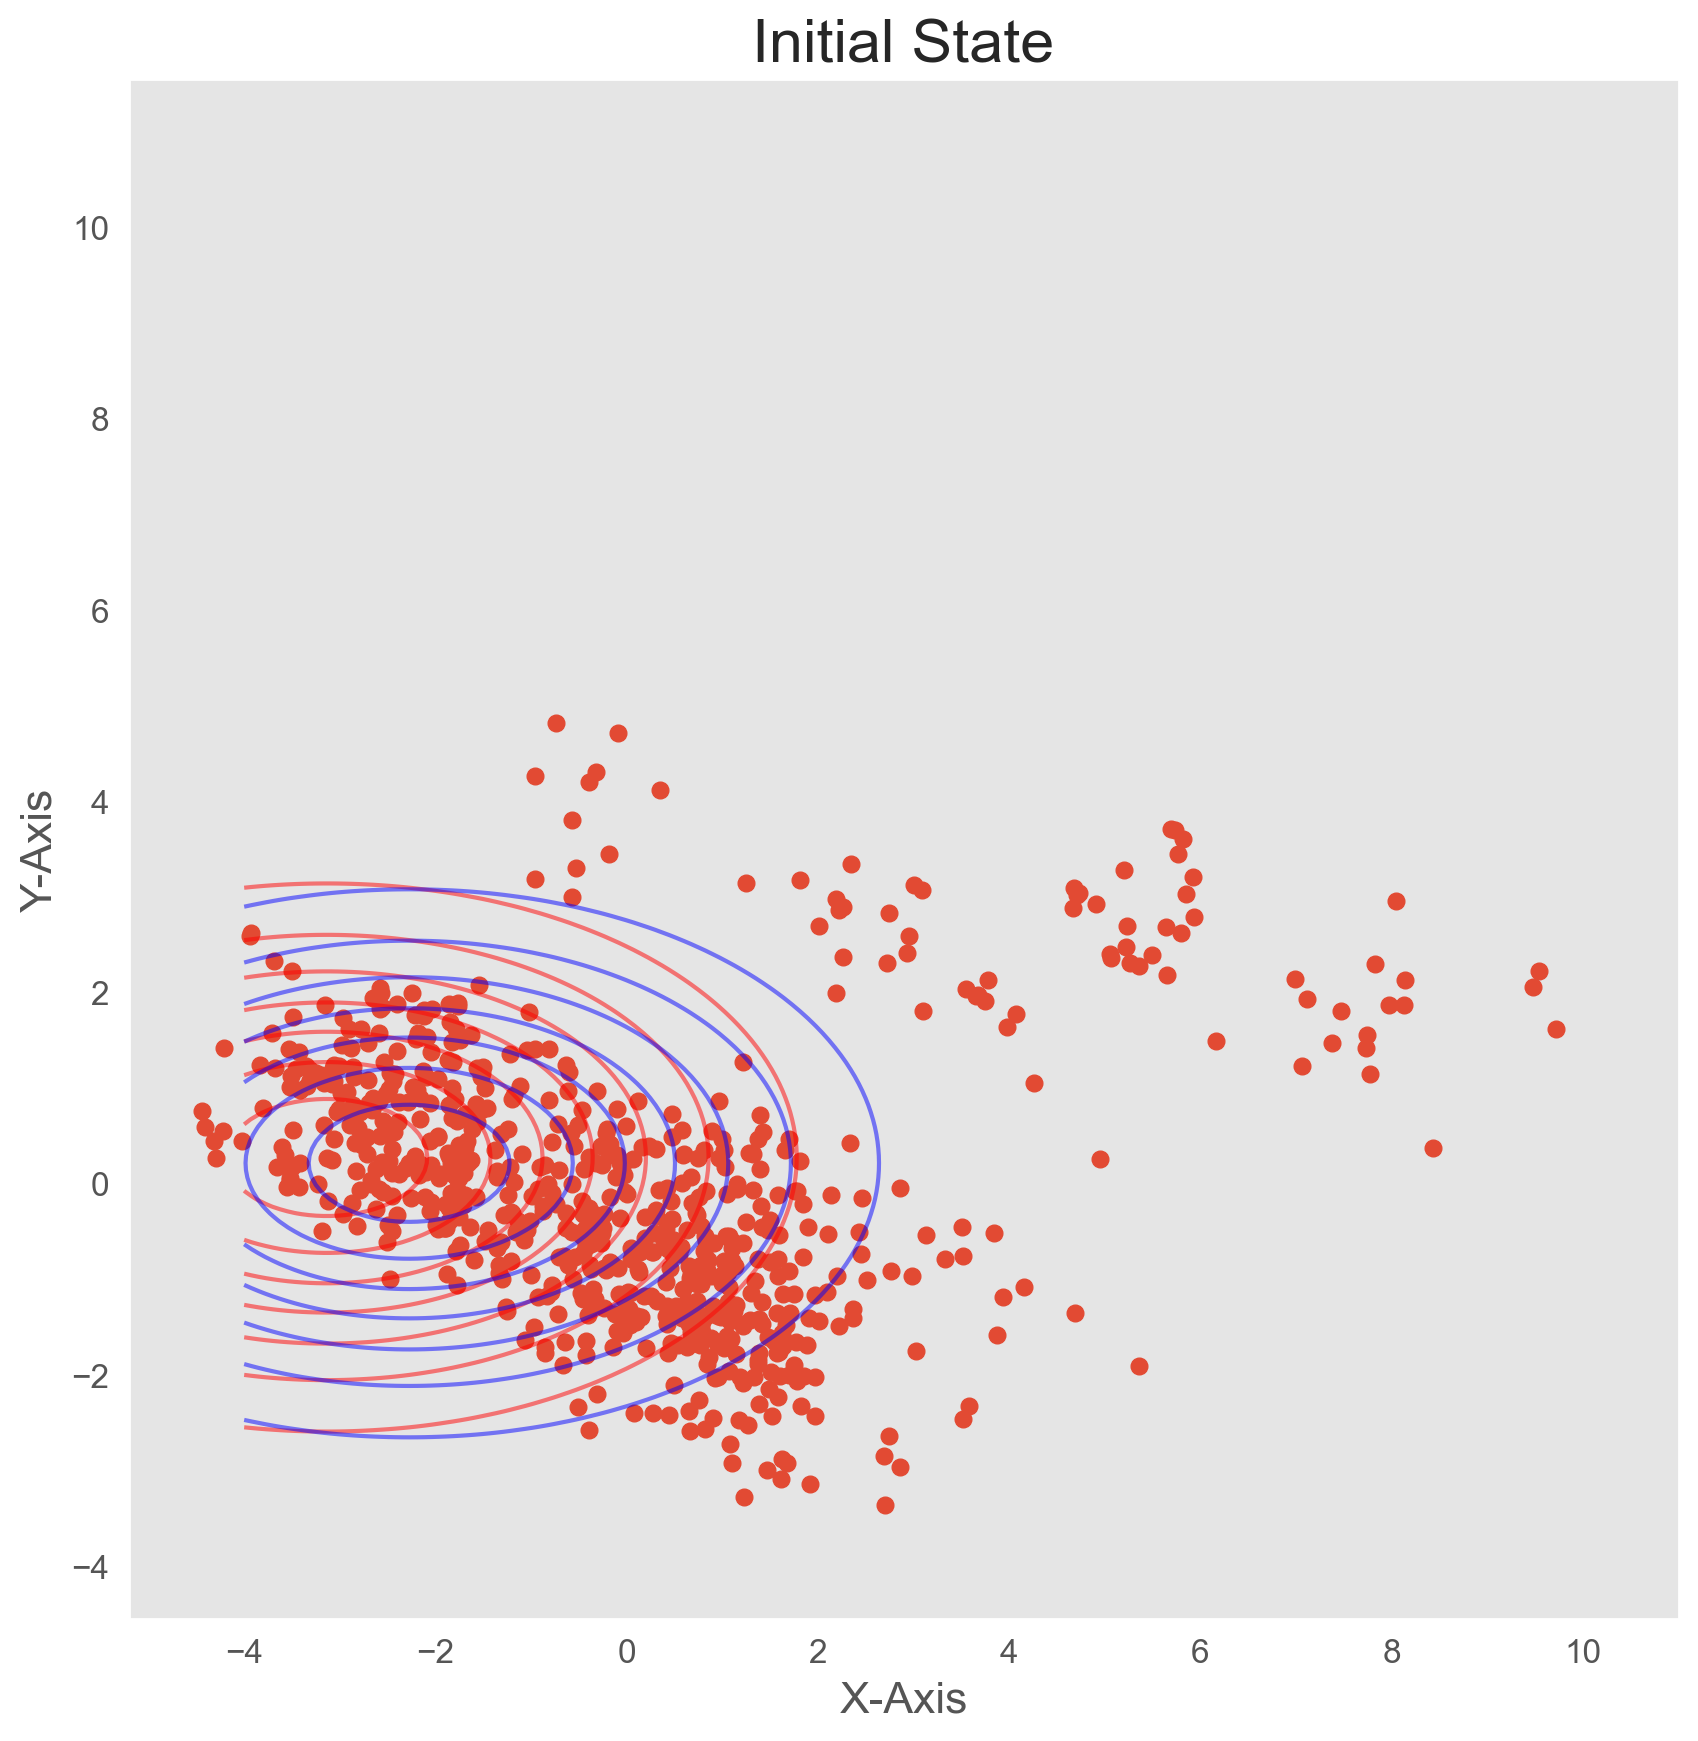

In [101]:
# fit model, test
import random
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

plt.figure(figsize=(10,7))
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], marker='o')
plt.axis('equal')
plt.xlabel('X-Axis', fontsize=16)
plt.ylabel('Y-Axis', fontsize=16)
plt.title('Ground Truth', fontsize=22)
plt.grid()
plt.show()

m1 = random.choice(pokemon_pca)
m2 = random.choice(pokemon_pca)
cov1 = np.cov(np.transpose(pokemon_pca))
cov2 = np.cov(np.transpose(pokemon_pca))
pi = 0.5

x1 = np.linspace(-4,11,200)
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [102]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]

    pt2 = multivariate_normal.pdf(pokemon_pca, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(pokemon_pca, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [103]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(pokemon_pca)):
        num_mu1 += (1-eval1[i]) * pokemon_pca[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * pokemon_pca[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(pokemon_pca)):

        q1 = np.matrix(pokemon_pca[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(pokemon_pca[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(pokemon_pca)

    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [104]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], marker='o')
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

### Evaluation

## Gaussian Mixture Models Clustering

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

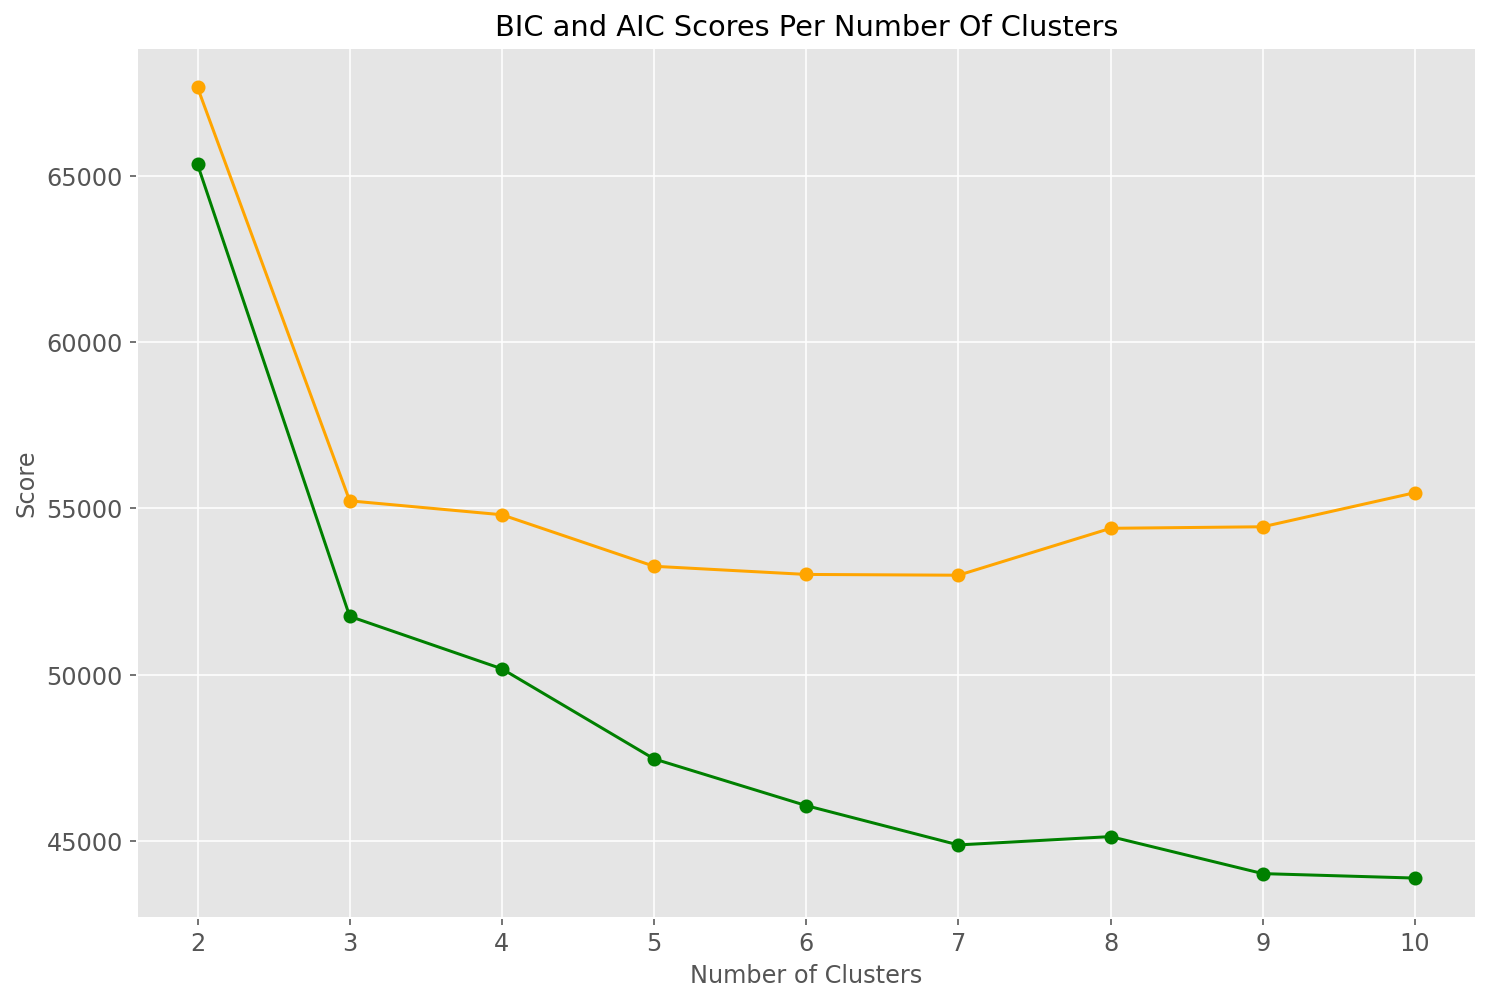

In [78]:
# Import the GaussianMixture class
from sklearn.mixture import GaussianMixture

# Set up a range of cluster numbers to try
n_range = range(2,11)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(pokemon)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(pokemon))
    aic_score.append(gm.aic(pokemon))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

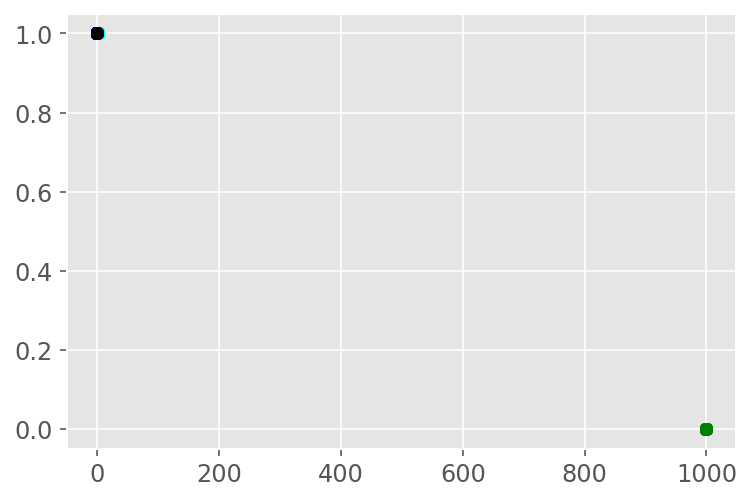

In [79]:
data = pokemon_x[top_corr.index[:2].tolist()]
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k]) 
plt.show()


### Evaluation

## Hierarchical Clustering

Performing agglomerative hierarchical clustering on the dataset, we will use the normalized dataset (scaled_pokemon_data_with_target).

First, we'll try with 2 clusters. 

In [80]:
#Use this instead of scaled_pokemon_data_with_target if scaling isn't the right thing.
from sklearn.preprocessing import normalize
normalizedPoke = normalize(pokemon) 

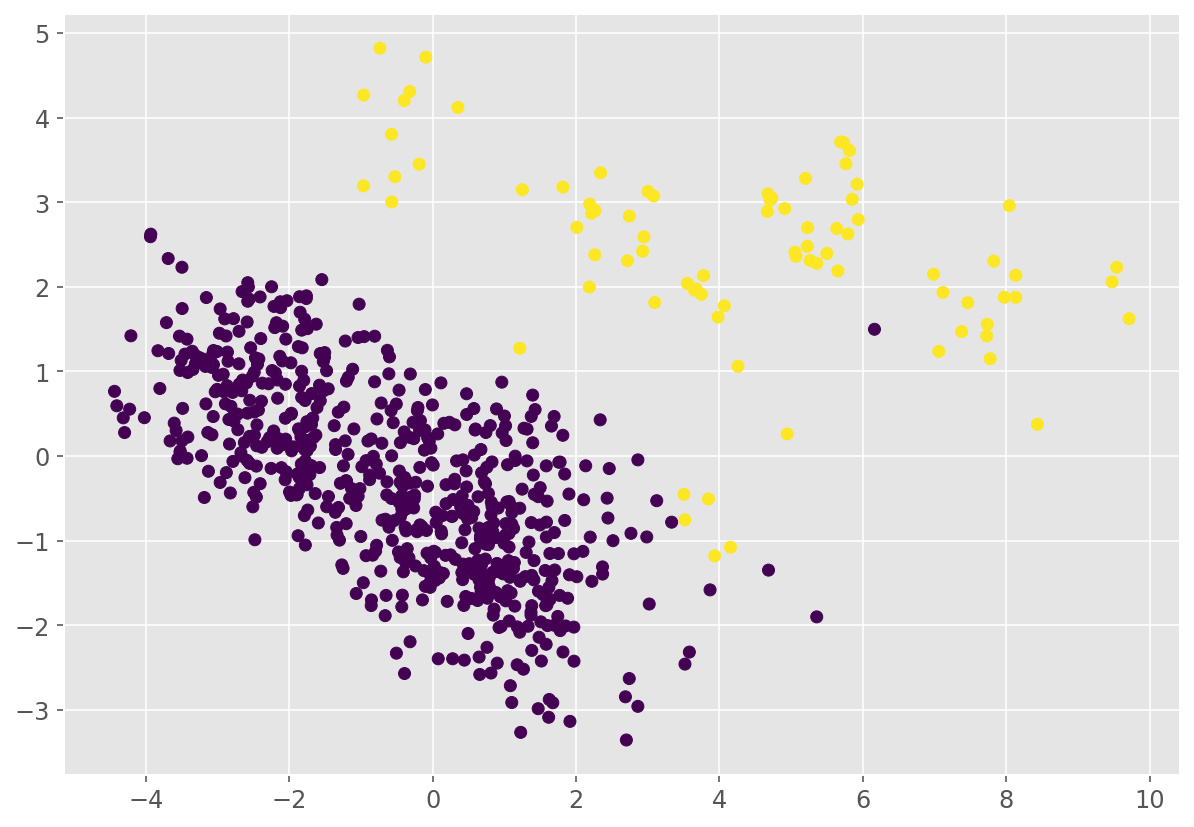

In [81]:
from sklearn.cluster import AgglomerativeClustering
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit_predict(scaled_pokemon_data_with_target)

plt.figure(figsize=(10, 7))  
two_clusters_fig = plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=cluster2.labels_)

### Now 3 clusters to compare with the baseline, k-means algorithm

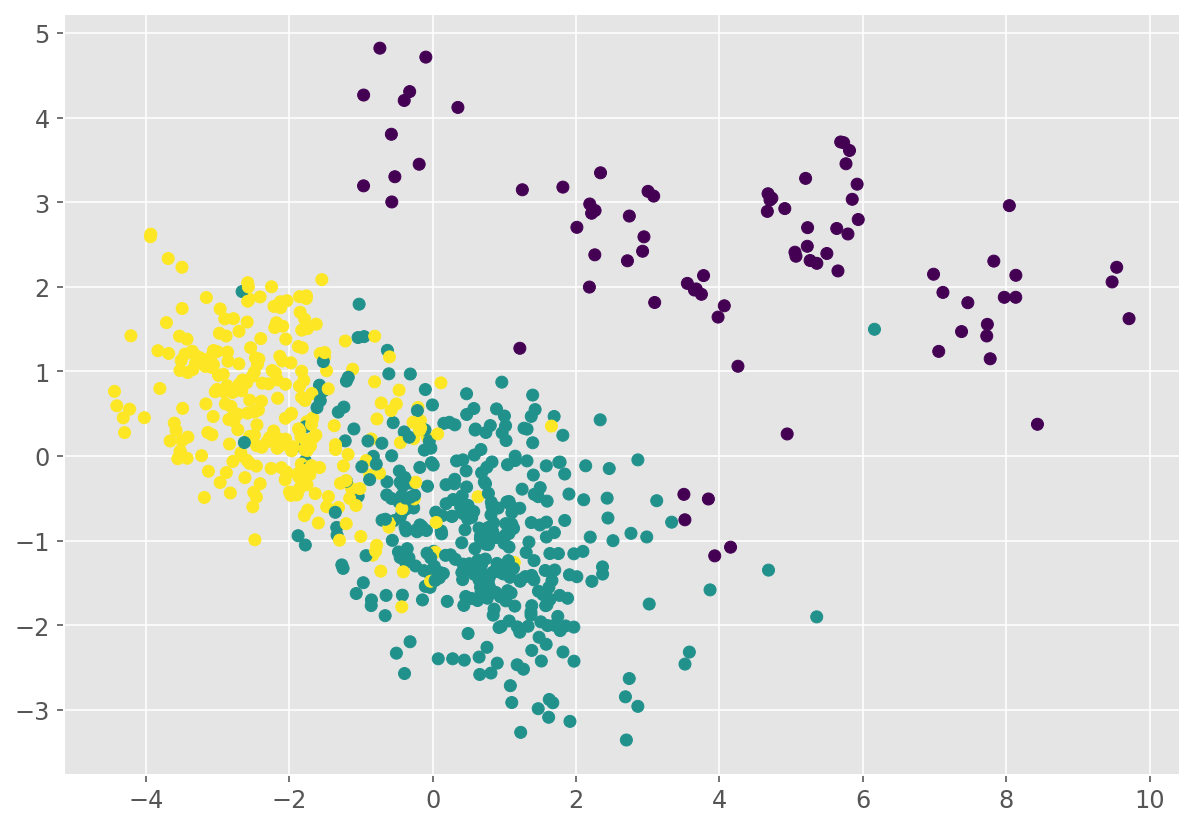

In [82]:
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster3.fit_predict(scaled_pokemon_data_with_target)

plt.figure(figsize=(10, 7))  
three_cluster_fig = plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=cluster3.labels_)

### Evaluation

Comparing the results to the K-means clustering algorithm, agglomerative has a lower accuracy as you can see that some parts of the first cluster (yellow) and the second cluster (blue) are incorrectly labeled. In the k-means baseline, there is a clear division between the two clusters. 

In addition to this, the third cluster (purple) consists of almost all the points separated from the first 2 clusters, however, in k-means, the points in the far left belong to the first cluster (yellow).

## Algorithms to computer the optimal clusters

### Elbow Clustering

In [83]:
# Finding the optimal number of clusters to use using ELbow algorithm
def optimise_k_means(data, max_k):
    means = []
    inertias = []
 
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    plt_fig_n(means,inertias,"Inertia")

(Below) Finding where it elbows using data without the target class.
Seems the optimal number is 3 here. 

optimise_k_means(scaled_pokemon_data_without_target)


c:\Users\alora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


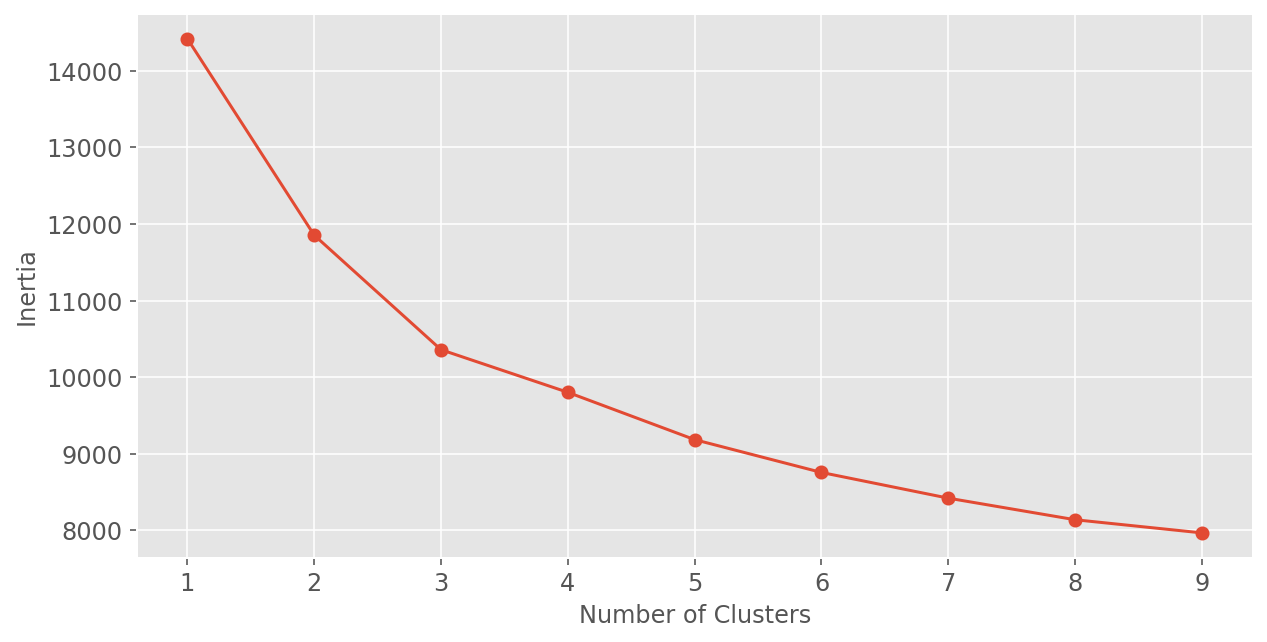

In [84]:
print("optimise_k_means(scaled_pokemon_data_without_target)")
optimise_k_means(scaled_pokemon_data_without_target, 10)

optimise_k_means(scaled_pokemon_data_with_target)


c:\Users\alora\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


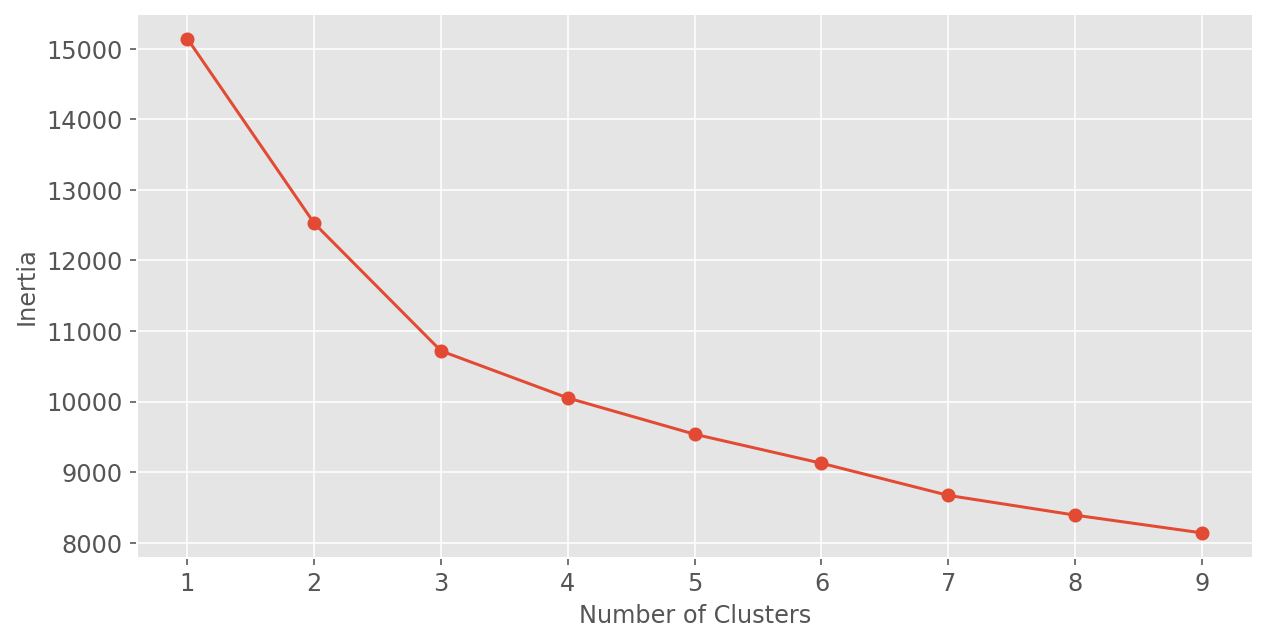

In [85]:
print("optimise_k_means(scaled_pokemon_data_with_target)")
optimise_k_means(scaled_pokemon_data_with_target, 10)

### Silhouette Clustering

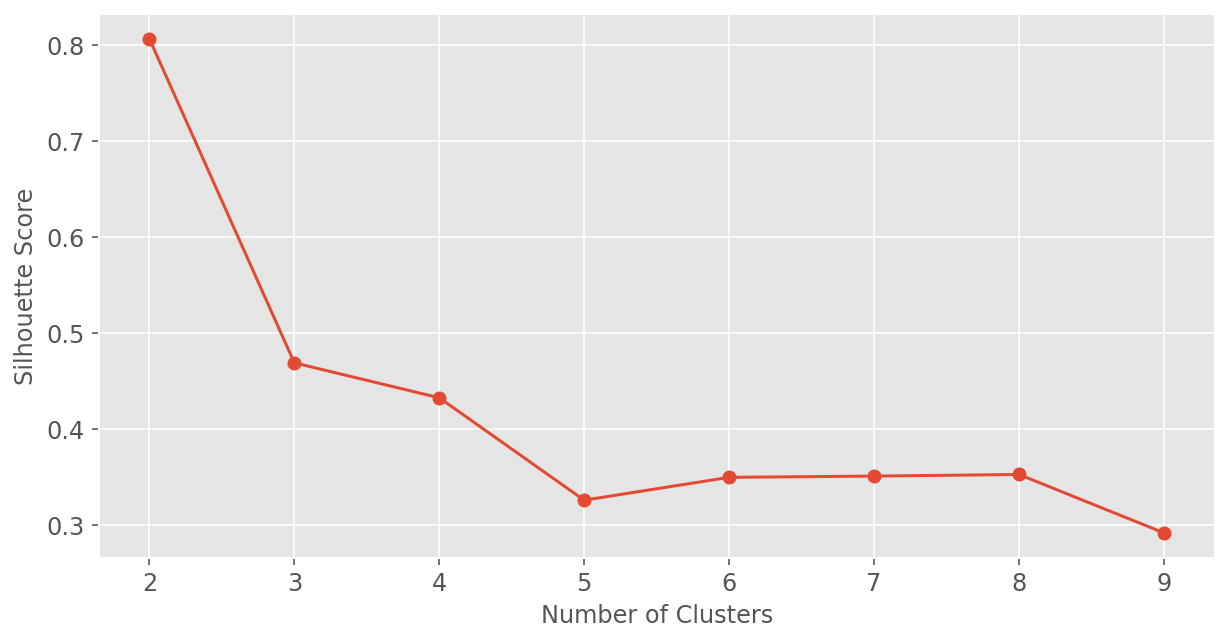

In [86]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

slist = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(pokemon_x) 
    score = silhouette_score(pokemon_x, kmeans.labels_, metric = 'euclidean')
    slist.append(score)


# Generate the silhouette plot
plt_fig_n([2,3,4,5,6,7,8,9],slist,"Silhouette Score")



If the silhouette score is low it generally means that the samples has been assigend to the wrong cluster. Silhouette score values near 0 indicate that the clusters are overlapping other clusters. For example, when we have 4 clusters we are getting a silhouette score of 0.45, which means the clusters are close to each other and each data point could be easily assinged to another cluster.

###  Davies-Bouldin score

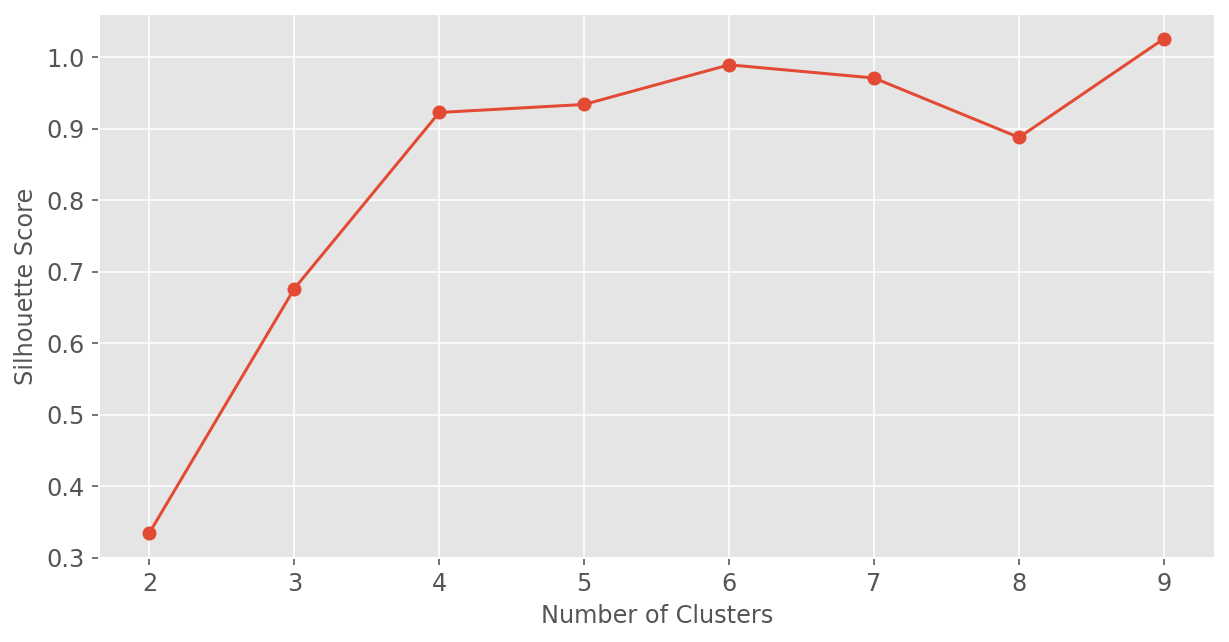

In [87]:
from sklearn.metrics import davies_bouldin_score
d_score_list = []
for x in range(2,10):
    kmeans = KMeans(n_clusters=x, random_state = 42).fit(pokemon_x)
    lab = kmeans.labels_
    d_score_list.append(davies_bouldin_score(pokemon_x, lab))

# Generate the Davies-Bouldin score plot
plt_fig_n([2,3,4,5,6,7,8,9],d_score_list,"Silhouette Score")
    

The closer the value of Davies Bouldin Score to 0 the better. The index signifies the average similarity between clusters. Similarity is the measure of the distance between the clusters and their sizes. For example, 2 is the best value of clusters for us, because 2s value is near 0.

### Calinski-Harabasz Index

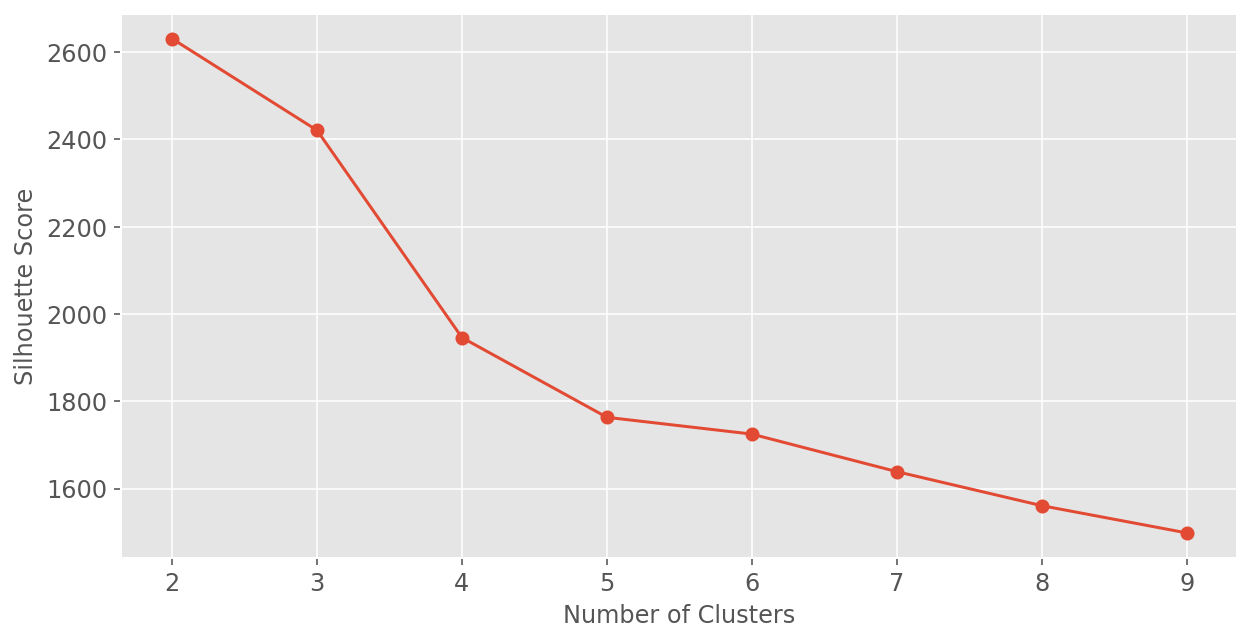

In [88]:
from sklearn.metrics import calinski_harabasz_score
d_score_list = []
for x in range(2,10):
    kmeans = KMeans(n_clusters=x, random_state = 42).fit(pokemon_x)
    lab = kmeans.labels_
    d_score_list.append(calinski_harabasz_score(pokemon_x, lab))

# Generate the Calinski-Harabasz Index score plot
plt_fig_n([2,3,4,5,6,7,8,9],d_score_list,"Silhouette Score")

### Evaluating the clustering Algorithms

#### What is the optimal number of clusters?

Consider the table of results below:

In [ ]:
results = {'Algorithm': ['Elbow Clustering', 'Silhouette Clustering', 'Davies-Bouldin Score', 'Calinski-Harabasz Index'],
'Optimal N. of Clusters': ['3', '2', '2', '2']}
results = pd.DataFrame(results)
print(results)

From the table, we can infer that the optimal amount of clusters for our dataset is 2. 

(BUT THEN WHY IS KMEANS RAN WITH 3???)

placeholder for algo reveal about the dataset

placeholder for comparison of performance

placeholder for pros and cons of diff algorithms